In [2]:
import re
import pandas as pd
df = pd.read_csv('blm_11k.csv', delimiter='\t')
def extract_links(text):
    return re.findall(r'(https?://\S+)', text)

df['links'] = df['content'].apply(extract_links)
all_links_blm = [item for sublist in df['links'].dropna() for item in sublist]



In [3]:
len(all_links_blm)

14355

In [6]:
import requests
import re
from collections import Counter
from tqdm import tqdm

access_token = "BQDgVir6XKyWRYR3Q4wHHvncvnXovi7KLlfaxFTikdoEqd1-ZF3Ev-YE0E8_mnuGzqf1LOUh1omCz_LabUhsbs0GqFRBDoR9bM_gIP7AQ7DF1myr0p0"

def extract_track_id(track_link):
    match = re.search(r"/track/([a-zA-Z0-9]+)", track_link)
    if match:
        return match.group(1)
    else:
        return None
def get_artist_names(track_id, access_token):
    url = f"https://api.spotify.com/v1/tracks/{track_id}"
    headers = {
        "Authorization": f"Bearer {access_token}"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        track_info = response.json()
        return [artist['name'] for artist in track_info['artists']]
    else:
        return None

def expand_shortened_url(shortened_url):
    try:
        response = requests.head(shortened_url, allow_redirects=True)
        if response.status_code == 200:
            return response.url
        else:
            print("Failed to expand the shortened URL:", shortened_url)
            return None
    except requests.exceptions.RequestException as e:
        print("An error occurred:", e)
        return None

def extract_artist_names_from_link(track_link):
    # Check if the link is shortened and expand it if necessary
    if "spotify.com" not in track_link:
        expanded_url = expand_shortened_url(track_link)
        if expanded_url:
            track_link = expanded_url

    # Extract artist names from the expanded link
    track_id = extract_track_id(track_link)
    if track_id:
        artist_names = get_artist_names(track_id, access_token)
        return artist_names
    else:
        return None

# Define a dictionary to store artist names and their frequencies
artist_frequency_map = {}

# Process the links with tqdm progress bar
for link in tqdm(all_links[:1000], desc="Processing links"):
    artist_names = extract_artist_names_from_link(link)
    if artist_names:
        # Update the artist frequency map
        for artist in artist_names:
            if artist in artist_frequency_map:
                artist_frequency_map[artist] += 1
            else:
                artist_frequency_map[artist] = 1

# Write the artist frequency map to a text file
with open('artist_frequency.txt', 'w') as file:
    for artist, frequency in artist_frequency_map.items():
        file.write(f"{artist}: {frequency}\n")


Processing links:   1%|          | 12/1000 [00:46<1:09:03,  4.19s/it]

Failed to expand the shortened URL: https://t.co/Kj5czghkUt


Processing links:   2%|▏         | 15/1000 [00:54<50:22,  3.07s/it]  

Failed to expand the shortened URL: https://t.co/8lPrcjganN


Processing links:   3%|▎         | 27/1000 [01:26<48:16,  2.98s/it]

An error occurred: HTTPSConnectionPool(host='curiouscat.qa', port=443): Max retries exceeded with url: /jihoosn/post/1161089546 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x78f34a92ecb0>: Failed to establish a new connection: [Errno -2] Name or service not known'))


Processing links:   4%|▍         | 40/1000 [02:06<55:23,  3.46s/it]  

Failed to expand the shortened URL: https://t.co/7oupXF8NmA


Processing links:   9%|▊         | 87/1000 [04:28<39:23,  2.59s/it]  

Failed to expand the shortened URL: https://t.co/6PtT8wb6Gz


Processing links:  11%|█         | 110/1000 [05:41<35:45,  2.41s/it] 

Failed to expand the shortened URL: https://t.co/lr6jPimbWI


Processing links:  11%|█▏        | 113/1000 [05:52<41:00,  2.77s/it]

Failed to expand the shortened URL: https://t.co/pf746XKFXE


Processing links:  13%|█▎        | 129/1000 [06:23<28:01,  1.93s/it]

Failed to expand the shortened URL: https://t.co/4ECbcc5PMg


Processing links:  17%|█▋        | 173/1000 [08:17<33:04,  2.40s/it]  

An error occurred: HTTPSConnectionPool(host='curiouscat.qa', port=443): Max retries exceeded with url: /jihoosn/post/1161088915 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x78f350ee4160>: Failed to establish a new connection: [Errno -2] Name or service not known'))


Processing links:  18%|█▊        | 178/1000 [08:24<21:19,  1.56s/it]

Failed to expand the shortened URL: https://t.co/IXXE2OpqSJ)


Processing links:  19%|█▉        | 190/1000 [08:55<31:19,  2.32s/it]

Failed to expand the shortened URL: https://t.co/z7dYLLlHXU


Processing links:  19%|█▉        | 192/1000 [09:00<30:22,  2.25s/it]

Failed to expand the shortened URL: https://t.co/3Qld1RlbLR


Processing links:  19%|█▉        | 194/1000 [09:03<25:03,  1.87s/it]

Failed to expand the shortened URL: https://t.co/6yR086M1vk


Processing links:  20%|█▉        | 196/1000 [09:12<47:22,  3.54s/it]

Failed to expand the shortened URL: https://t.co/Cp2iJQlgPV


Processing links:  23%|██▎       | 232/1000 [10:50<27:23,  2.14s/it]

Failed to expand the shortened URL: https://t.co/G5cEsgI53z


Processing links:  24%|██▍       | 238/1000 [11:05<34:25,  2.71s/it]

Failed to expand the shortened URL: https://t.co/WuOhbV94Ez


Processing links:  26%|██▋       | 263/1000 [12:06<29:25,  2.40s/it]

Failed to expand the shortened URL: https://t.co/Ordn2fxRyD


Processing links:  28%|██▊       | 285/1000 [12:56<18:42,  1.57s/it]

Failed to expand the shortened URL: https://t.co/9LvHx7IRq3]


Processing links:  29%|██▊       | 286/1000 [12:57<15:54,  1.34s/it]

Failed to expand the shortened URL: https://t.co/U0PUtpbZdu}


Processing links:  29%|██▉       | 288/1000 [13:05<30:02,  2.53s/it]

Failed to expand the shortened URL: https://t.co/YcE23XRGay


Processing links:  30%|██▉       | 297/1000 [13:23<23:07,  1.97s/it]

Failed to expand the shortened URL: https://t.co/vPciABiMPb


Processing links:  30%|███       | 300/1000 [13:30<26:00,  2.23s/it]

Failed to expand the shortened URL: https://t.co/K5wAs7xMYy


Processing links:  30%|███       | 305/1000 [13:45<36:58,  3.19s/it]

An error occurred: HTTPSConnectionPool(host='curiouscat.qa', port=443): Max retries exceeded with url: /jihoosn/post/1161088259 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x78f350ee5690>: Failed to establish a new connection: [Errno -2] Name or service not known'))


Processing links:  32%|███▏      | 322/1000 [14:40<30:50,  2.73s/it]

Failed to expand the shortened URL: https://t.co/0lyMBfOtD4


Processing links:  33%|███▎      | 333/1000 [15:03<23:29,  2.11s/it]

Failed to expand the shortened URL: https://t.co/867Q7tDXpN


Processing links:  34%|███▍      | 344/1000 [15:34<23:54,  2.19s/it]

Failed to expand the shortened URL: https://t.co/TjnUuobM45🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥...New


Processing links:  36%|███▌      | 358/1000 [16:24<32:50,  3.07s/it]

Failed to expand the shortened URL: https://t.co/TVEOpqlaTw


Processing links:  36%|███▋      | 365/1000 [16:37<20:33,  1.94s/it]

Failed to expand the shortened URL: https://t.co/R6mVfnzHAk


Processing links:  39%|███▉      | 388/1000 [17:24<18:08,  1.78s/it]

Failed to expand the shortened URL: https://t.co/4WIw5P3Q3J


Processing links:  40%|███▉      | 397/1000 [17:44<24:55,  2.48s/it]

Failed to expand the shortened URL: https://t.co/bLzvMakHQ3


Processing links:  44%|████▍     | 445/1000 [19:36<16:01,  1.73s/it]

Failed to expand the shortened URL: https://t.co/Ws38eRy5g7


Processing links:  45%|████▍     | 446/1000 [19:38<15:31,  1.68s/it]

Failed to expand the shortened URL: https://t.co/xLECbWqYbm


Processing links:  45%|████▍     | 448/1000 [19:43<18:49,  2.05s/it]

Failed to expand the shortened URL: https://t.co/oBrMOUQx8D


Processing links:  45%|████▍     | 449/1000 [19:44<17:49,  1.94s/it]

Failed to expand the shortened URL: https://t.co/OTPixx1Qkj


Processing links:  46%|████▌     | 460/1000 [20:13<29:42,  3.30s/it]

An error occurred: HTTPSConnectionPool(host='curiouscat.qa', port=443): Max retries exceeded with url: /jihoosn/post/1161087756 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x78f350ee4250>: Failed to establish a new connection: [Errno -2] Name or service not known'))


Processing links:  50%|████▉     | 499/1000 [21:25<13:53,  1.66s/it]

Failed to expand the shortened URL: https://t.co/9DO4VZOM93


Processing links:  50%|█████     | 502/1000 [21:29<11:45,  1.42s/it]

Failed to expand the shortened URL: https://t.co/jGIwa1KS3T


Processing links:  52%|█████▏    | 515/1000 [21:49<12:31,  1.55s/it]

Failed to expand the shortened URL: https://t.co/TkeHFAskaZ


Processing links:  52%|█████▏    | 516/1000 [21:50<11:33,  1.43s/it]

Failed to expand the shortened URL: https://t.co/S573Ru7xNG


Processing links:  52%|█████▏    | 518/1000 [21:53<10:57,  1.36s/it]

Failed to expand the shortened URL: https://t.co/eBzGMEsvLA


Processing links:  55%|█████▌    | 550/1000 [22:52<11:25,  1.52s/it]

Failed to expand the shortened URL: https://t.co/YpV1aBZAea


Processing links:  56%|█████▌    | 558/1000 [23:07<12:57,  1.76s/it]

Failed to expand the shortened URL: https://t.co/CnSiO0X1B4


Processing links:  56%|█████▌    | 560/1000 [23:11<13:07,  1.79s/it]

Failed to expand the shortened URL: https://t.co/KdysfAmp8m


Processing links:  57%|█████▋    | 569/1000 [23:26<11:05,  1.54s/it]

Failed to expand the shortened URL: https://t.co/y4kD5EvSvg


Processing links:  58%|█████▊    | 576/1000 [23:37<09:52,  1.40s/it]

Failed to expand the shortened URL: https://t.co/YzycJRvPUx


Processing links:  59%|█████▉    | 592/1000 [24:06<11:45,  1.73s/it]

Failed to expand the shortened URL: https://t.co/kePjZ22Bqj


Processing links:  59%|█████▉    | 593/1000 [24:07<11:06,  1.64s/it]

Failed to expand the shortened URL: https://t.co/LEqjhcJeEt


Processing links:  60%|██████    | 601/1000 [26:36<4:40:11, 42.13s/it]

An error occurred: HTTPSConnectionPool(host='www.thestrongandfreepodcast.com', port=443): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x78f34a975810>, 'Connection to www.thestrongandfreepodcast.com timed out. (connect timeout=None)'))


Processing links:  61%|██████    | 607/1000 [26:54<55:54,  8.54s/it]  

An error occurred: HTTPSConnectionPool(host='curiouscat.qa', port=443): Max retries exceeded with url: /jihoosn/post/1161086994 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x78f34a92ff70>: Failed to establish a new connection: [Errno -2] Name or service not known'))


Processing links:  61%|██████▏   | 614/1000 [27:05<12:51,  2.00s/it]

Failed to expand the shortened URL: https://t.co/MCqm4YQ577


Processing links:  63%|██████▎   | 629/1000 [27:28<09:40,  1.57s/it]

Failed to expand the shortened URL: https://t.co/6tRVYsdgKM


Processing links:  65%|██████▌   | 651/1000 [27:58<06:37,  1.14s/it]

Failed to expand the shortened URL: https://t.co/qrNfeDsrAO,


Processing links:  65%|██████▌   | 652/1000 [28:34<1:07:24, 11.62s/it]

Failed to expand the shortened URL: https://t.co/Y9FvVdbm2e


Processing links:  66%|██████▌   | 656/1000 [28:42<24:17,  4.24s/it]  

Failed to expand the shortened URL: https://t.co/0JqsDxbJPd


Processing links:  68%|██████▊   | 685/1000 [29:33<08:57,  1.71s/it]

Failed to expand the shortened URL: https://t.co/zXiKEilqs6


Processing links:  69%|██████▉   | 690/1000 [29:41<08:47,  1.70s/it]

Failed to expand the shortened URL: https://t.co/XFy4VbL68w


Processing links:  71%|███████   | 710/1000 [30:12<06:55,  1.43s/it]

Failed to expand the shortened URL: https://t.co/tz9tKrkdpK


Processing links:  71%|███████▏  | 713/1000 [30:18<09:35,  2.00s/it]

An error occurred: HTTPSConnectionPool(host='curiouscat.qa', port=443): Max retries exceeded with url: /jihoosn/post/1161085854 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x78f350ee5ed0>: Failed to establish a new connection: [Errno -2] Name or service not known'))


Processing links:  72%|███████▏  | 721/1000 [30:38<08:57,  1.93s/it]

Failed to expand the shortened URL: https://t.co/aF6hinjvEY


Processing links:  73%|███████▎  | 726/1000 [30:45<07:10,  1.57s/it]

Failed to expand the shortened URL: https://t.co/tfiXmd2zyq


Processing links:  74%|███████▍  | 743/1000 [31:13<06:37,  1.55s/it]

Failed to expand the shortened URL: https://t.co/CwexyXpq5O


Processing links:  78%|███████▊  | 776/1000 [32:10<09:48,  2.63s/it]

Failed to expand the shortened URL: https://t.co/PH3rsLq3eP...


Processing links:  78%|███████▊  | 777/1000 [32:11<07:59,  2.15s/it]

Failed to expand the shortened URL: https://t.co/iAkzzM8qqX...


Processing links:  78%|███████▊  | 778/1000 [32:13<07:17,  1.97s/it]

Failed to expand the shortened URL: https://t.co/J6mdnnnN6k


Processing links:  78%|███████▊  | 785/1000 [32:25<06:25,  1.79s/it]

Failed to expand the shortened URL: https://t.co/thrGR1XgxA


Processing links:  80%|███████▉  | 797/1000 [32:50<06:29,  1.92s/it]

Failed to expand the shortened URL: https://t.co/5z4ZxobqW0


Processing links:  81%|████████▏ | 814/1000 [33:18<05:21,  1.73s/it]

Failed to expand the shortened URL: https://t.co/30GoZNqy1N


Processing links:  85%|████████▌ | 852/1000 [34:17<03:49,  1.55s/it]

Failed to expand the shortened URL: https://t.co/nBMI5TBwpg


Processing links:  86%|████████▌ | 855/1000 [34:21<03:03,  1.26s/it]

Failed to expand the shortened URL: https://t.co/T8hkYqUon3)


Processing links:  86%|████████▌ | 860/1000 [34:28<03:07,  1.34s/it]

Failed to expand the shortened URL: https://t.co/KR0xQTfCYZ


Processing links:  86%|████████▋ | 864/1000 [34:33<02:45,  1.22s/it]

Failed to expand the shortened URL: https://t.co/8CRZdMdoow)


Processing links:  87%|████████▋ | 866/1000 [34:36<02:53,  1.30s/it]

Failed to expand the shortened URL: https://t.co/AEvZ166L7z


Processing links:  88%|████████▊ | 878/1000 [34:54<03:54,  1.92s/it]

An error occurred: HTTPSConnectionPool(host='curiouscat.qa', port=443): Max retries exceeded with url: /jihoosn/post/1148547753 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x78f350ee6f80>: Failed to establish a new connection: [Errno -2] Name or service not known'))


Processing links:  90%|█████████ | 903/1000 [35:36<01:59,  1.23s/it]

Failed to expand the shortened URL: https://t.co/41agzRCYi7


Processing links:  93%|█████████▎| 930/1000 [36:18<02:10,  1.87s/it]

Failed to expand the shortened URL: https://t.co/hMvWUYfbN7


Processing links:  94%|█████████▎| 935/1000 [36:25<01:30,  1.39s/it]

Failed to expand the shortened URL: https://t.co/kr5MgbFfvn]


Processing links:  94%|█████████▎| 936/1000 [36:26<01:19,  1.24s/it]

Failed to expand the shortened URL: https://t.co/5B9EJ3yqSV}


Processing links:  96%|█████████▌| 958/1000 [37:08<01:07,  1.61s/it]

Failed to expand the shortened URL: https://t.co/1UaVf1vjLk


Processing links:  97%|█████████▋| 966/1000 [37:21<00:53,  1.58s/it]

Failed to expand the shortened URL: https://t.co/I9IPsjFmU1


Processing links:  98%|█████████▊| 975/1000 [37:37<01:01,  2.47s/it]

An error occurred: HTTPSConnectionPool(host='curiouscat.qa', port=443): Max retries exceeded with url: /jihoosn/post/1148547805 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x78f34a92e8f0>: Failed to establish a new connection: [Errno -2] Name or service not known'))


Processing links:  98%|█████████▊| 980/1000 [37:45<00:33,  1.69s/it]

Failed to expand the shortened URL: https://t.co/O1LIbHYXqU


Processing links:  98%|█████████▊| 982/1000 [37:48<00:28,  1.58s/it]

Failed to expand the shortened URL: https://t.co/MCqm4YQ577


Processing links:  99%|█████████▉| 990/1000 [37:59<00:13,  1.39s/it]

Failed to expand the shortened URL: https://t.co/iFCXQgHMBq


Processing links: 100%|█████████▉| 996/1000 [38:08<00:05,  1.50s/it]

Failed to expand the shortened URL: https://t.co/cf8X9IwAho


Processing links: 100%|██████████| 1000/1000 [38:14<00:00,  2.29s/it]


/home/utsav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


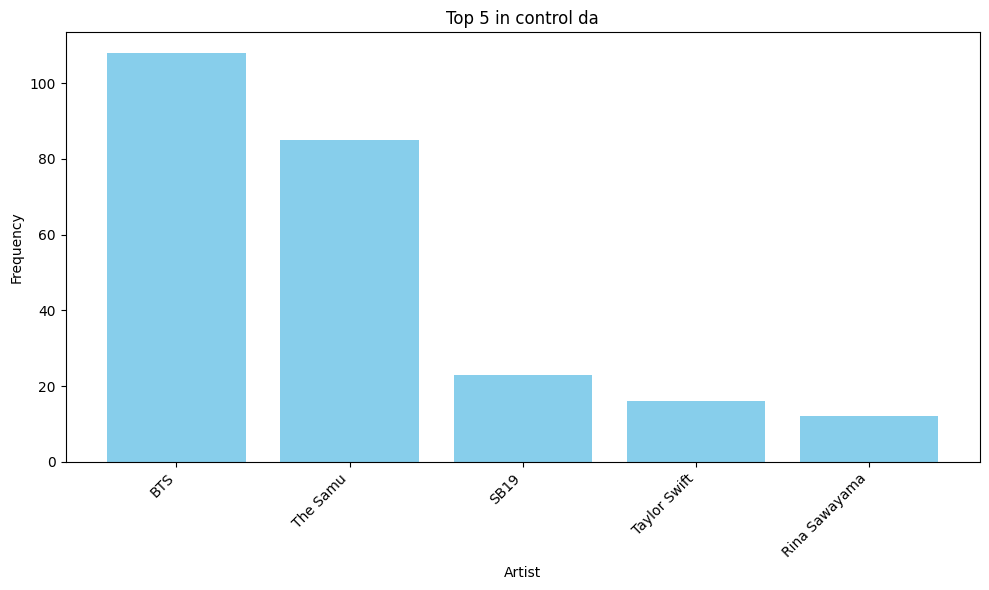

In [9]:

import matplotlib.pyplot as plt

# Read the artist frequency map for Cluster 2
cluster_3_artist_frequency_file = "artist_frequency.txt"
with open(cluster_3_artist_frequency_file, "r") as file:
    artist_frequency_lines = file.readlines()

# Parse artist frequency map for Cluster 2
artist_frequency_map = {}
for line in artist_frequency_lines:
    artist, frequency = line.strip().split(": ")
    artist_frequency_map[artist] = int(frequency)

# Get top 5 artists from Cluster 2
top_5_artists = sorted(artist_frequency_map.items(), key=lambda x: x[1], reverse=True)[:5]

# Plot top 5 artists
plt.figure(figsize=(10, 6))
plt.bar([artist[0] for artist in top_5_artists], [artist[1] for artist in top_5_artists], color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.title('Top 5 in control da')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [13]:
import requests
import re
from collections import Counter
from tqdm import tqdm

access_token = "BQDgVir6XKyWRYR3Q4wHHvncvnXovi7KLlfaxFTikdoEqd1-ZF3Ev-YE0E8_mnuGzqf1LOUh1omCz_LabUhsbs0GqFRBDoR9bM_gIP7AQ7DF1myr0p0"

def extract_track_id(track_link):
    match = re.search(r"/track/([a-zA-Z0-9]+)", track_link)
    if match:
        return match.group(1)
    else:
        return None
def get_artist_names(track_id, access_token):
    url = f"https://api.spotify.com/v1/tracks/{track_id}"
    headers = {
        "Authorization": f"Bearer {access_token}"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        track_info = response.json()
        return [artist['name'] for artist in track_info['artists']]
    else:
        return None

def expand_shortened_url(shortened_url):
    try:
        response = requests.head(shortened_url, allow_redirects=True)
        if response.status_code == 200:
            return response.url
        else:
            return None
    except requests.exceptions.RequestException as e:
        print("An error occurred:", e)
        return None

def extract_artist_names_from_link(track_link):
    # Check if the link is shortened and expand it if necessary
    if "spotify.com" not in track_link:
        expanded_url = expand_shortened_url(track_link)
        if expanded_url:
            track_link = expanded_url

    # Extract artist names from the expanded link
    track_id = extract_track_id(track_link)
    if track_id:
        artist_names = get_artist_names(track_id, access_token)
        return artist_names
    else:
        return None

# Define a dictionary to store artist names and their frequencies
artist_frequency_map = {}

# Process the links with tqdm progress bar
for link in tqdm(all_links_blm[:1000], desc="Processing links"):
    artist_names = extract_artist_names_from_link(link)
    if artist_names:
        # Update the artist frequency map
        for artist in artist_names:
            if artist in artist_frequency_map:
                artist_frequency_map[artist] += 1
            else:
                artist_frequency_map[artist] = 1

# Write the artist frequency map to a text file
with open('artist_frequency_blm.txt', 'w') as file:
    for artist, frequency in artist_frequency_map.items():
        file.write(f"{artist}: {frequency}\n")


Processing links:  32%|███▏      | 318/1000 [09:41<22:56,  2.02s/it]

An error occurred: HTTPSConnectionPool(host='www.ninakristoffersonsbillieholidaystory.com', port=443): Max retries exceeded with url: /home/donate/ (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)')))


Processing links:  32%|███▏      | 321/1000 [09:46<18:06,  1.60s/it]

An error occurred: HTTPSConnectionPool(host='www.ninakristoffersonsbillieholidaystory.com', port=443): Max retries exceeded with url: /home/donate/ (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)')))


Processing links:  42%|████▏     | 423/1000 [12:59<12:42,  1.32s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  44%|████▍     | 445/1000 [22:06<17:20,  1.88s/it]    

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  45%|████▍     | 446/1000 [22:06<12:58,  1.41s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  45%|████▌     | 451/1000 [22:13<11:24,  1.25s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  45%|████▌     | 453/1000 [22:15<09:33,  1.05s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  45%|████▌     | 454/1000 [22:16<08:11,  1.11it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  46%|████▌     | 456/1000 [22:18<07:53,  1.15it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  46%|████▌     | 460/1000 [22:24<12:04,  1.34s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  48%|████▊     | 478/1000 [22:57<16:49,  1.93s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  48%|████▊     | 484/1000 [23:06<12:35,  1.46s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  49%|████▉     | 494/1000 [23:21<11:14,  1.33s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  50%|████▉     | 497/1000 [23:26<11:45,  1.40s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  50%|█████     | 504/1000 [23:38<11:58,  1.45s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  50%|█████     | 505/1000 [23:38<09:17,  1.13s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  52%|█████▏    | 516/1000 [24:01<13:12,  1.64s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  52%|█████▏    | 518/1000 [24:03<10:48,  1.35s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  52%|█████▎    | 525/1000 [24:16<16:22,  2.07s/it]

An error occurred: HTTPSConnectionPool(host='www.givingapurposepodcast.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x78f34a9e9ea0>: Failed to establish a new connection: [Errno -2] Name or service not known'))


Processing links:  55%|█████▍    | 549/1000 [25:10<11:03,  1.47s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  56%|█████▌    | 555/1000 [25:23<13:39,  1.84s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  56%|█████▌    | 562/1000 [25:36<11:28,  1.57s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  57%|█████▋    | 568/1000 [25:56<22:52,  3.18s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  57%|█████▋    | 569/1000 [25:56<16:42,  2.32s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  60%|█████▉    | 596/1000 [27:08<10:32,  1.57s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  60%|██████    | 602/1000 [27:18<09:36,  1.45s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  61%|██████    | 608/1000 [27:32<15:02,  2.30s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  61%|██████▏   | 613/1000 [27:50<16:29,  2.56s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  62%|██████▏   | 615/1000 [27:51<10:16,  1.60s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  62%|██████▏   | 619/1000 [27:56<07:19,  1.15s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  63%|██████▎   | 631/1000 [28:20<12:30,  2.03s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  64%|██████▍   | 638/1000 [28:32<09:19,  1.55s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  66%|██████▋   | 664/1000 [29:18<07:26,  1.33s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  66%|██████▋   | 665/1000 [29:19<05:54,  1.06s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  68%|██████▊   | 675/1000 [29:44<12:42,  2.35s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  68%|██████▊   | 680/1000 [29:53<09:30,  1.78s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  68%|██████▊   | 684/1000 [30:07<17:46,  3.38s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  69%|██████▊   | 687/1000 [30:15<14:39,  2.81s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  70%|██████▉   | 699/1000 [31:00<21:08,  4.22s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  70%|███████   | 700/1000 [31:01<15:47,  3.16s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  71%|███████   | 707/1000 [31:16<08:10,  1.67s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  71%|███████   | 712/1000 [31:26<08:09,  1.70s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  72%|███████▏  | 720/1000 [31:55<19:51,  4.26s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  74%|███████▎  | 736/1000 [32:25<06:28,  1.47s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  74%|███████▍  | 738/1000 [32:27<04:55,  1.13s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  74%|███████▍  | 743/1000 [32:38<07:12,  1.68s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  74%|███████▍  | 745/1000 [32:40<05:44,  1.35s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  75%|███████▍  | 746/1000 [32:40<04:39,  1.10s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  75%|███████▌  | 753/1000 [32:53<06:54,  1.68s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  76%|███████▌  | 756/1000 [32:56<04:42,  1.16s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  76%|███████▌  | 757/1000 [32:57<03:39,  1.11it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  76%|███████▋  | 763/1000 [33:11<08:10,  2.07s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  77%|███████▋  | 766/1000 [33:15<05:30,  1.41s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  77%|███████▋  | 772/1000 [33:25<06:20,  1.67s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  79%|███████▉  | 789/1000 [34:10<06:29,  1.85s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  80%|███████▉  | 795/1000 [34:22<05:38,  1.65s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  81%|████████  | 807/1000 [34:48<04:04,  1.27s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  81%|████████▏ | 813/1000 [34:58<04:08,  1.33s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  82%|████████▏ | 815/1000 [35:05<08:08,  2.64s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  83%|████████▎ | 827/1000 [35:36<04:12,  1.46s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  83%|████████▎ | 830/1000 [35:39<03:11,  1.13s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  83%|████████▎ | 833/1000 [35:42<03:01,  1.09s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  83%|████████▎ | 834/1000 [35:43<02:23,  1.16it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  84%|████████▍ | 838/1000 [35:47<02:25,  1.11it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  84%|████████▍ | 845/1000 [36:00<04:27,  1.72s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  85%|████████▌ | 850/1000 [36:09<04:15,  1.70s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  86%|████████▌ | 855/1000 [36:25<06:02,  2.50s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  86%|████████▋ | 865/1000 [36:51<05:18,  2.36s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  87%|████████▋ | 869/1000 [37:02<07:02,  3.22s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  87%|████████▋ | 872/1000 [37:19<09:25,  4.42s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  88%|████████▊ | 879/1000 [37:29<02:45,  1.37s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  88%|████████▊ | 881/1000 [37:31<02:00,  1.02s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  88%|████████▊ | 882/1000 [37:31<01:39,  1.19it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  89%|████████▊ | 886/1000 [37:37<02:16,  1.20s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  89%|████████▉ | 892/1000 [37:51<03:01,  1.68s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  90%|████████▉ | 897/1000 [37:58<02:15,  1.31s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  90%|████████▉ | 899/1000 [38:00<01:50,  1.09s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  90%|█████████ | 902/1000 [38:05<02:21,  1.44s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  90%|█████████ | 905/1000 [38:11<02:37,  1.66s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  91%|█████████ | 909/1000 [38:24<04:08,  2.73s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  91%|█████████ | 910/1000 [38:24<03:05,  2.06s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  92%|█████████▏| 916/1000 [38:35<02:34,  1.84s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  92%|█████████▏| 920/1000 [38:48<02:46,  2.08s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  92%|█████████▎| 925/1000 [39:01<03:05,  2.47s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  93%|█████████▎| 928/1000 [39:07<02:27,  2.05s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  93%|█████████▎| 931/1000 [39:13<02:05,  1.82s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  94%|█████████▎| 936/1000 [39:27<02:36,  2.44s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  94%|█████████▎| 937/1000 [39:28<01:57,  1.86s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  94%|█████████▍| 944/1000 [39:42<01:39,  1.78s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  95%|█████████▌| 952/1000 [39:59<01:32,  1.93s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  96%|█████████▌| 961/1000 [40:18<01:02,  1.59s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  97%|█████████▋| 966/1000 [40:28<01:01,  1.81s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  97%|█████████▋| 969/1000 [40:32<00:40,  1.31s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  98%|█████████▊| 984/1000 [41:00<00:22,  1.40s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  98%|█████████▊| 985/1000 [41:01<00:17,  1.14s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  99%|█████████▉| 989/1000 [41:09<00:16,  1.50s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  99%|█████████▉| 993/1000 [41:15<00:09,  1.39s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links: 100%|█████████▉| 999/1000 [41:26<00:01,  1.66s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links: 100%|██████████| 1000/1000 [41:28<00:00,  2.49s/it]


In [14]:
import requests
import re
from tqdm import tqdm

access_token = "BQD_bJssQkimAdmN1zYBy3RkYind_gAyrWXBMZtz6GdJiXM8gE_O6GlgVfKLR2yKmwjPjA2MVKV2McqTvZCiqpgJRmGaOnGu7yc_R1ym_Mx9wYWLHWo"

def extract_track_id(track_link):
    match = re.search(r"/track/([a-zA-Z0-9]+)", track_link)
    if match:
        return match.group(1)
    else:
        return None

def get_artist_names(track_id, access_token):
    url = f"https://api.spotify.com/v1/tracks/{track_id}"
    headers = {
        "Authorization": f"Bearer {access_token}"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        track_info = response.json()
        return [artist['name'] for artist in track_info['artists']]
    else:
        return None

def expand_shortened_url(shortened_url):
    try:
        response = requests.head(shortened_url, allow_redirects=True)
        if response.status_code == 200:
            return response.url
        else:
            return None
    except requests.exceptions.RequestException as e:
        print("An error occurred:", e)
        return None

def extract_artist_names_from_link(track_link):
    # Check if the link is shortened and expand it if necessary
    if "spotify.com" not in track_link:
        expanded_url = expand_shortened_url(track_link)
        if expanded_url:
            track_link = expanded_url

    # Extract artist names from the expanded link
    track_id = extract_track_id(track_link)
    if track_id:
        artist_names = get_artist_names(track_id, access_token)
        return artist_names
    else:
        return None

# Define a dictionary to store artist names and their frequencies
artist_frequency_map = {}

# Process the links with tqdm progress bar
for link in tqdm(all_links_blm[1000:3000], desc="Processing links"):
    artist_names = extract_artist_names_from_link(link)
    if artist_names:
        # Update the artist frequency map
        for artist in artist_names:
            if artist in artist_frequency_map:
                artist_frequency_map[artist] += 1
            else:
                artist_frequency_map[artist] = 1

# Append the artist frequency map to the text file
with open('artist_frequency_blm.txt', 'a') as file:
    for artist, frequency in artist_frequency_map.items():
        file.write(f"{artist}: {frequency}\n")


Processing links:   0%|          | 6/2000 [00:10<48:32,  1.46s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   1%|          | 12/2000 [00:20<46:59,  1.42s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   1%|          | 14/2000 [00:27<1:15:38,  2.29s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   1%|▏         | 26/2000 [00:54<50:45,  1.54s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   2%|▏         | 32/2000 [01:04<44:34,  1.36s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   3%|▎         | 60/2000 [02:02<53:05,  1.64s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   3%|▎         | 62/2000 [02:05<46:30,  1.44s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   4%|▍         | 78/2000 [02:38<48:30,  1.51s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   4%|▍         | 83/2000 [02:47<51:47,  1.62s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   4%|▍         | 84/2000 [02:48<41:15,  1.29s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   4%|▍         | 85/2000 [02:48<33:05,  1.04s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   5%|▌         | 101/2000 [03:26<1:04:36,  2.04s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   5%|▌         | 103/2000 [03:29<54:08,  1.71s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   6%|▌         | 111/2000 [03:42<42:05,  1.34s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   6%|▌         | 120/2000 [03:58<48:57,  1.56s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   6%|▋         | 128/2000 [04:16<1:02:30,  2.00s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   6%|▋         | 130/2000 [04:20<54:33,  1.75s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   7%|▋         | 132/2000 [04:23<54:10,  1.74s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   7%|▋         | 136/2000 [04:32<59:22,  1.91s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   7%|▋         | 138/2000 [04:37<1:07:39,  2.18s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   7%|▋         | 139/2000 [04:38<52:11,  1.68s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   8%|▊         | 156/2000 [05:19<57:35,  1.87s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   8%|▊         | 158/2000 [05:23<54:46,  1.78s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   8%|▊         | 162/2000 [05:39<1:32:59,  3.04s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   9%|▊         | 171/2000 [06:04<1:06:15,  2.17s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   9%|▉         | 179/2000 [06:21<54:15,  1.79s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   9%|▉         | 183/2000 [06:28<48:25,  1.60s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:   9%|▉         | 186/2000 [06:31<34:55,  1.16s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  10%|▉         | 191/2000 [06:38<39:35,  1.31s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  10%|▉         | 196/2000 [06:43<26:25,  1.14it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  10%|█         | 208/2000 [07:04<51:33,  1.73s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  11%|█         | 216/2000 [07:20<47:05,  1.58s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  11%|█         | 217/2000 [07:21<36:53,  1.24s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  12%|█▏        | 239/2000 [08:04<51:30,  1.76s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  12%|█▏        | 243/2000 [08:10<39:41,  1.36s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  12%|█▏        | 248/2000 [08:18<42:40,  1.46s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  13%|█▎        | 257/2000 [08:43<56:14,  1.94s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  14%|█▍        | 275/2000 [09:20<48:06,  1.67s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  14%|█▍        | 276/2000 [09:21<37:29,  1.30s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  14%|█▍        | 280/2000 [09:27<40:06,  1.40s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  15%|█▍        | 295/2000 [09:49<34:04,  1.20s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  15%|█▌        | 302/2000 [09:58<30:47,  1.09s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  16%|█▌        | 314/2000 [10:21<40:41,  1.45s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  16%|█▌        | 317/2000 [10:24<33:17,  1.19s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  16%|█▋        | 326/2000 [10:43<49:20,  1.77s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  16%|█▋        | 328/2000 [10:48<55:00,  1.97s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  17%|█▋        | 331/2000 [10:52<42:07,  1.51s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  17%|█▋        | 344/2000 [11:24<1:11:36,  2.59s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  17%|█▋        | 347/2000 [11:28<47:19,  1.72s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  17%|█▋        | 349/2000 [19:10<63:50:19, 139.20s/it]

An error occurred: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


Processing links:  18%|█▊        | 354/2000 [20:28<17:54:36, 39.17s/it] 

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  18%|█▊        | 358/2000 [20:34<4:44:01, 10.38s/it] 

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  18%|█▊        | 369/2000 [21:01<52:42,  1.94s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  19%|█▉        | 379/2000 [21:19<35:56,  1.33s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  20%|█▉        | 390/2000 [21:43<55:41,  2.08s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  20%|█▉        | 391/2000 [21:43<41:58,  1.57s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  20%|█▉        | 396/2000 [21:58<1:07:11,  2.51s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  20%|██        | 406/2000 [22:19<39:36,  1.49s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  20%|██        | 408/2000 [22:21<32:13,  1.21s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  21%|██        | 422/2000 [23:24<1:42:16,  3.89s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  21%|██▏       | 426/2000 [23:30<50:23,  1.92s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  21%|██▏       | 427/2000 [23:31<46:16,  1.76s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  23%|██▎       | 456/2000 [24:40<1:12:13,  2.81s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  23%|██▎       | 459/2000 [24:44<42:41,  1.66s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  23%|██▎       | 460/2000 [24:45<33:03,  1.29s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  23%|██▎       | 462/2000 [24:46<26:36,  1.04s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  23%|██▎       | 465/2000 [24:50<27:35,  1.08s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  23%|██▎       | 469/2000 [25:01<1:07:37,  2.65s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  24%|██▍       | 478/2000 [25:16<36:54,  1.46s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  24%|██▍       | 481/2000 [25:20<33:57,  1.34s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  24%|██▍       | 484/2000 [25:23<26:42,  1.06s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  25%|██▌       | 508/2000 [26:18<52:07,  2.10s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  26%|██▌       | 510/2000 [26:20<37:41,  1.52s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  26%|██▌       | 516/2000 [26:39<1:11:52,  2.91s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  26%|██▋       | 530/2000 [27:12<42:53,  1.75s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  27%|██▋       | 534/2000 [27:21<48:15,  1.97s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  27%|██▋       | 537/2000 [29:40<17:02:01, 41.92s/it]

An error occurred: HTTPSConnectionPool(host='open.spotify.com', port=443): Max retries exceeded with url: /track/5MYO1NVhtUfDmgQC2RZuaY?si=aLs4vgOPQlKENzs4UBBsyw (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x78f348cd7700>: Failed to establish a new connection: [Errno 101] Network is unreachable'))


Processing links:  27%|██▋       | 542/2000 [29:50<3:22:04,  8.32s/it] 

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  27%|██▋       | 544/2000 [29:53<1:54:05,  4.70s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  27%|██▋       | 547/2000 [29:58<1:02:32,  2.58s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  28%|██▊       | 563/2000 [30:39<46:25,  1.94s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  29%|██▊       | 572/2000 [30:58<40:19,  1.69s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  29%|██▉       | 579/2000 [31:14<43:00,  1.82s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  29%|██▉       | 582/2000 [31:19<40:04,  1.70s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  29%|██▉       | 583/2000 [31:20<31:38,  1.34s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  29%|██▉       | 588/2000 [31:32<46:17,  1.97s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  30%|███       | 603/2000 [32:05<37:53,  1.63s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  31%|███       | 619/2000 [32:44<34:07,  1.48s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  31%|███       | 621/2000 [32:47<33:42,  1.47s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  31%|███▏      | 629/2000 [33:03<39:06,  1.71s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  32%|███▏      | 646/2000 [33:39<32:52,  1.46s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  32%|███▏      | 648/2000 [33:41<27:13,  1.21s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  33%|███▎      | 653/2000 [33:50<33:43,  1.50s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  33%|███▎      | 656/2000 [33:54<29:37,  1.32s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  33%|███▎      | 664/2000 [34:21<1:14:08,  3.33s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  33%|███▎      | 669/2000 [34:38<1:14:36,  3.36s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  34%|███▎      | 673/2000 [34:52<1:15:11,  3.40s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  34%|███▍      | 685/2000 [37:44<15:42:56, 43.02s/it]

An error occurred: HTTPSConnectionPool(host='open.spotify.com', port=443): Max retries exceeded with url: /track/5MYO1NVhtUfDmgQC2RZuaY?si=ppjXxJSwSvqtgLEMu1Tnhw (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x78f3493c1f00>: Failed to establish a new connection: [Errno 101] Network is unreachable'))


Processing links:  34%|███▍      | 689/2000 [38:11<5:12:23, 14.30s/it] 

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  35%|███▌      | 704/2000 [38:58<44:01,  2.04s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  36%|███▌      | 720/2000 [39:36<43:32,  2.04s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  36%|███▋      | 725/2000 [39:45<33:29,  1.58s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  36%|███▋      | 726/2000 [39:45<26:31,  1.25s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  37%|███▋      | 735/2000 [40:07<37:21,  1.77s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  37%|███▋      | 745/2000 [40:29<39:11,  1.87s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  38%|███▊      | 750/2000 [40:37<29:54,  1.44s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  38%|███▊      | 752/2000 [40:40<27:01,  1.30s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  38%|███▊      | 754/2000 [40:42<24:13,  1.17s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  38%|███▊      | 764/2000 [40:58<25:23,  1.23s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  38%|███▊      | 770/2000 [41:06<24:24,  1.19s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  39%|███▉      | 778/2000 [41:40<1:27:12,  4.28s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  39%|███▉      | 783/2000 [42:02<1:13:15,  3.61s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  40%|███▉      | 790/2000 [44:32<4:43:39, 14.07s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  40%|████      | 801/2000 [44:56<34:22,  1.72s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  40%|████      | 806/2000 [45:02<21:50,  1.10s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  41%|████      | 813/2000 [45:17<38:00,  1.92s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  41%|████      | 814/2000 [45:17<28:33,  1.45s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  41%|████      | 816/2000 [45:19<21:14,  1.08s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  41%|████      | 818/2000 [45:20<18:09,  1.09it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  42%|████▏     | 843/2000 [46:08<28:15,  1.47s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  43%|████▎     | 854/2000 [46:25<24:43,  1.29s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  43%|████▎     | 855/2000 [46:25<19:33,  1.02s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  43%|████▎     | 864/2000 [46:43<32:48,  1.73s/it]

An error occurred: HTTPSConnectionPool(host='fortheburgh.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x78f3493c2890>: Failed to establish a new connection: [Errno -2] Name or service not known'))


Processing links:  44%|████▍     | 876/2000 [47:10<27:59,  1.49s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  44%|████▍     | 880/2000 [47:16<25:26,  1.36s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  44%|████▍     | 881/2000 [47:17<19:58,  1.07s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  44%|████▍     | 883/2000 [47:19<21:54,  1.18s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  44%|████▍     | 890/2000 [47:31<25:34,  1.38s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  45%|████▍     | 892/2000 [47:34<22:23,  1.21s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  45%|████▍     | 893/2000 [47:34<17:31,  1.05it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  45%|████▍     | 896/2000 [47:37<17:44,  1.04it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  45%|████▌     | 902/2000 [47:47<22:39,  1.24s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  46%|████▌     | 915/2000 [48:10<28:21,  1.57s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  46%|████▋     | 927/2000 [51:05<13:37:52, 45.73s/it]

An error occurred: HTTPSConnectionPool(host='open.spotify.com', port=443): Max retries exceeded with url: /episode/3G2A20BwAVM7DqYx7ZYLYb?si=tL1NAmnvR5OVHt_GHlonGw (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x78f34ba62bf0>: Failed to establish a new connection: [Errno 101] Network is unreachable'))


Processing links:  47%|████▋     | 938/2000 [51:34<48:27,  2.74s/it]   

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  47%|████▋     | 943/2000 [51:43<28:30,  1.62s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  48%|████▊     | 953/2000 [52:01<28:08,  1.61s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  48%|████▊     | 966/2000 [52:30<25:23,  1.47s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  48%|████▊     | 970/2000 [52:36<21:28,  1.25s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  49%|████▊     | 972/2000 [52:38<20:29,  1.20s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  49%|████▉     | 976/2000 [52:44<20:41,  1.21s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  49%|████▉     | 977/2000 [52:44<16:20,  1.04it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  50%|█████     | 1008/2000 [53:52<23:42,  1.43s/it] 

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  50%|█████     | 1010/2000 [53:55<23:54,  1.45s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  51%|█████     | 1015/2000 [54:04<23:56,  1.46s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  51%|█████     | 1016/2000 [54:05<18:55,  1.15s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  51%|█████     | 1018/2000 [54:07<17:12,  1.05s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  51%|█████     | 1023/2000 [54:14<19:22,  1.19s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  51%|█████▏    | 1025/2000 [54:17<18:31,  1.14s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  51%|█████▏    | 1028/2000 [54:21<18:46,  1.16s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  52%|█████▏    | 1033/2000 [54:30<21:04,  1.31s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  52%|█████▏    | 1045/2000 [54:51<27:23,  1.72s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  52%|█████▏    | 1049/2000 [54:56<19:01,  1.20s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  53%|█████▎    | 1051/2000 [54:58<15:27,  1.02it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  53%|█████▎    | 1054/2000 [55:01<16:22,  1.04s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  53%|█████▎    | 1055/2000 [55:02<13:30,  1.17it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  53%|█████▎    | 1056/2000 [55:02<11:17,  1.39it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  53%|█████▎    | 1059/2000 [55:07<16:32,  1.06s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  53%|█████▎    | 1062/2000 [55:11<17:26,  1.12s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  53%|█████▎    | 1068/2000 [55:21<21:30,  1.38s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  54%|█████▍    | 1087/2000 [55:56<21:11,  1.39s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  55%|█████▍    | 1095/2000 [56:10<22:36,  1.50s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  55%|█████▍    | 1097/2000 [56:12<18:36,  1.24s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  55%|█████▍    | 1099/2000 [56:14<16:54,  1.13s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  55%|█████▌    | 1103/2000 [56:21<20:54,  1.40s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  56%|█████▌    | 1116/2000 [57:53<26:37,  1.81s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  56%|█████▌    | 1121/2000 [58:01<18:46,  1.28s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  56%|█████▌    | 1123/2000 [58:03<16:09,  1.11s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  56%|█████▋    | 1128/2000 [58:14<24:53,  1.71s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  57%|█████▋    | 1138/2000 [58:34<24:28,  1.70s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  57%|█████▋    | 1147/2000 [58:51<22:08,  1.56s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  58%|█████▊    | 1155/2000 [59:17<1:06:07,  4.70s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  58%|█████▊    | 1167/2000 [59:53<52:55,  3.81s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  59%|█████▉    | 1179/2000 [1:00:19<29:18,  2.14s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  59%|█████▉    | 1181/2000 [1:00:25<32:41,  2.40s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  60%|█████▉    | 1198/2000 [1:01:15<33:37,  2.52s/it]  

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  60%|█████▉    | 1199/2000 [1:01:16<24:58,  1.87s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  60%|██████    | 1204/2000 [1:01:22<16:49,  1.27s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  60%|██████    | 1209/2000 [1:01:30<16:33,  1.26s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links:  61%|██████    | 1223/2000 [1:01:53<19:03,  1.47s/it]

/home/utsav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


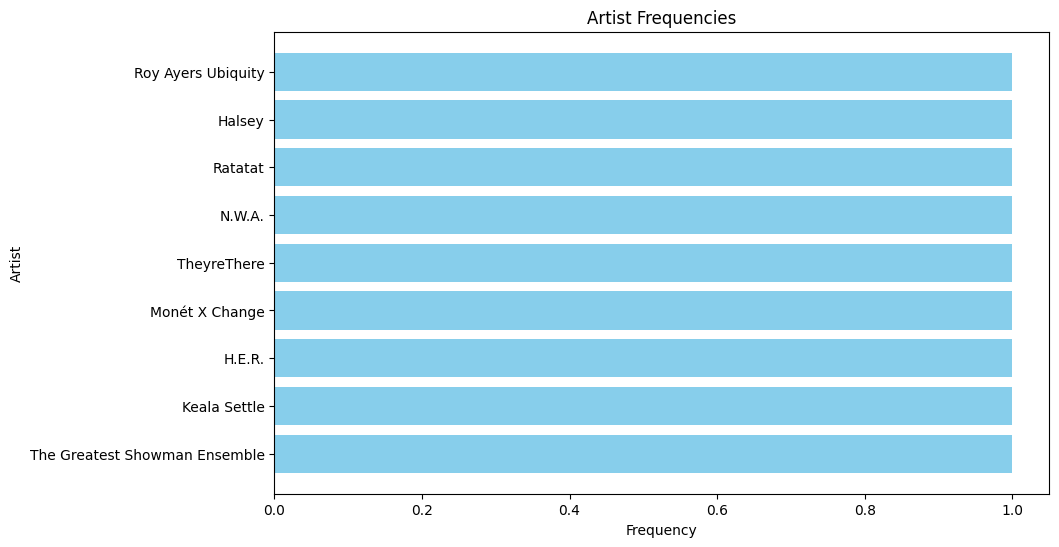

In [1]:
import matplotlib.pyplot as plt

# Data
artists = ['Roy Ayers Ubiquity', 'Halsey', 'Ratatat', 'N.W.A.', 'TheyreThere', 'Monét X Change', 'H.E.R.', 'Keala Settle', 'The Greatest Showman Ensemble']
frequencies = [1, 1, 1, 1, 1, 1, 1, 1, 1]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(artists, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.title('Artist Frequencies')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()


In [11]:
import requests
import re
from collections import Counter
from tqdm import tqdm
import os

access_token = "BQB5BMPSyXc0MQK_wqzV8Dd3lC4WiYxJyOjPCx-DBkp1d63qq2KxxAzNq2mcKX4wZbfI4Qdgtc0icdEWFCgVhDZx2jpf91nE8npOPdf6mIVVBHOGzl8"

def extract_track_id(track_link):
    match = re.search(r"/track/([a-zA-Z0-9]+)", track_link)
    if match:
        return match.group(1)
    else:
        return None

def get_artist_names(track_id, access_token):
    url = f"https://api.spotify.com/v1/tracks/{track_id}"
    headers = {
        "Authorization": f"Bearer {access_token}"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        track_info = response.json()
        return [artist['name'] for artist in track_info['artists']]
    else:
        return None

def expand_shortened_url(shortened_url):
    try:
        response = requests.head(shortened_url, allow_redirects=True)
        if response.status_code == 200:
            return response.url
        else:
            print("Failed to expand the shortened URL:", shortened_url)
            return None
    except requests.exceptions.RequestException as e:
        print("An error occurred:", e)
        return None

def extract_artist_names_from_link(track_link):
    # Check if the link is shortened and expand it if necessary
    if "spotify.com" not in track_link:
        expanded_url = expand_shortened_url(track_link)
        if expanded_url:
            track_link = expanded_url

    # Extract artist names from the expanded link
    track_id = extract_track_id(track_link)
    if track_id:
        artist_names = get_artist_names(track_id, access_token)
        return artist_names
    else:
        return None

def extract_artists_from_cluster(cluster_id, cluster_links):
    # Define a directory to store artist frequency files
    output_dir = "cluster_artist_frequency"
    os.makedirs(output_dir, exist_ok=True)

    # Define a dictionary to store artist names and their frequencies for the cluster
    cluster_artist_frequency_map = {}

    # Process the links within the cluster
    for link in tqdm(cluster_links, desc=f"Processing links in Cluster {cluster_id}"):
        artist_names = extract_artist_names_from_link(link)
        if artist_names:
            # Update the artist frequency map for the cluster
            for artist in artist_names:
                if artist in cluster_artist_frequency_map:
                    cluster_artist_frequency_map[artist] += 1
                else:
                    cluster_artist_frequency_map[artist] = 1

    # Write the artist frequency map for the cluster to a text file
    cluster_filename = os.path.join(output_dir, f'cluster_{cluster_id}_artist_frequency.txt')
    with open(cluster_filename, 'w') as file:
        for artist, frequency in cluster_artist_frequency_map.items():
            file.write(f"{artist}: {frequency}\n")

# Read the links from the file
cluster_11_links_file = "cluster_links/cluster_11_links.txt"
with open(cluster_11_links_file, "r") as file:
    cluster_11_links = [line.strip() for line in file.readlines()]

# Extract artists from the first 2000 links in Cluster 1
extract_artists_from_cluster(11, cluster_11_links)


Processing links in Cluster 11:  34%|███▍      | 15/44 [00:20<00:38,  1.32s/it]

Failed to expand the shortened URL: https://t.co/j7z43FvvRS


Processing links in Cluster 11:  41%|████      | 18/44 [00:23<00:27,  1.05s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 11:  45%|████▌     | 20/44 [00:26<00:32,  1.34s/it]

Failed to expand the shortened URL: https://t.co/zi2PXAj8fG


Processing links in Cluster 11:  59%|█████▉    | 26/44 [00:35<00:26,  1.48s/it]

Failed to expand the shortened URL: https://t.co/lnPtB8hSDB


Processing links in Cluster 11:  73%|███████▎  | 32/44 [00:44<00:14,  1.21s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 11:  75%|███████▌  | 33/44 [00:45<00:15,  1.38s/it]

Failed to expand the shortened URL: https://t.co/T27tRDXo4j


Processing links in Cluster 11:  77%|███████▋  | 34/44 [00:46<00:10,  1.07s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 11:  80%|███████▉  | 35/44 [00:47<00:11,  1.30s/it]

Failed to expand the shortened URL: https://t.co/oKB4fBijkO


Processing links in Cluster 11:  84%|████████▍ | 37/44 [00:50<00:09,  1.42s/it]

Failed to expand the shortened URL: https://t.co/GDxcMVLaRj


Processing links in Cluster 11:  91%|█████████ | 40/44 [00:55<00:06,  1.51s/it]

Failed to expand the shortened URL: https://t.co/Tc0YdTYlD2


Processing links in Cluster 11:  98%|█████████▊| 43/44 [00:58<00:01,  1.09s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 11: 100%|██████████| 44/44 [01:00<00:00,  1.37s/it]

Failed to expand the shortened URL: https://t.co/dSzjrz5nCV


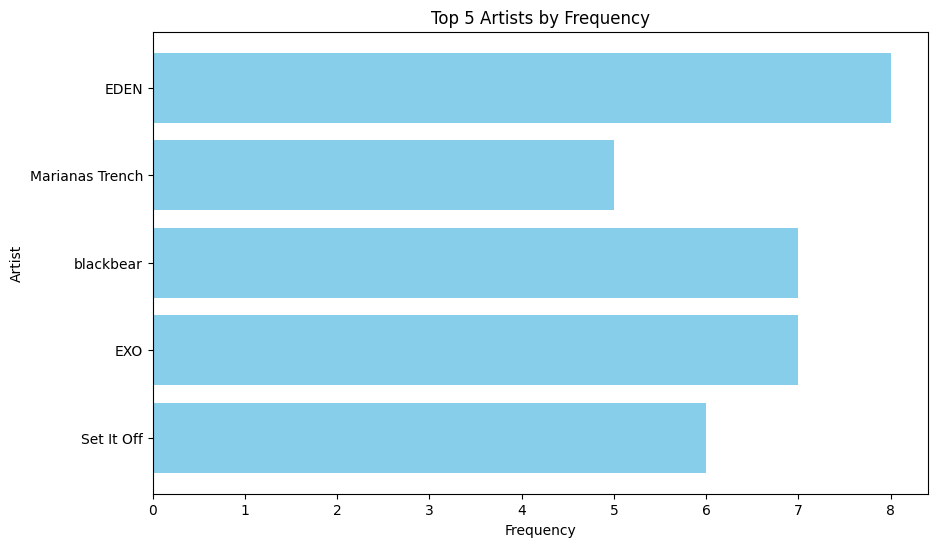

In [10]:
import matplotlib.pyplot as plt

# Data for the top 5 artists
artists = ['EDEN', 'Marianas Trench', 'blackbear', 'EXO', 'Set It Off']
frequencies = [8, 5, 7, 7, 6]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(artists, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.title('Top 5 Artists by Frequency')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()


In [13]:
import requests
import re
from collections import Counter
from tqdm import tqdm
import os

access_token = "BQBD8-cRXWPlgVhyGKHk0gOMxskxaeoRq4X_GV8oxtNccEDRs8nVZ_sE40Tm65Z4pdeUQmYPMLAlBl1LojZwtqFRAX_5sDhB0NFaNm5fmMe5Pb1rZ0Y"

def extract_track_id(track_link):
    match = re.search(r"/track/([a-zA-Z0-9]+)", track_link)
    if match:
        return match.group(1)
    else:
        return None

def get_artist_names(track_id, access_token):
    url = f"https://api.spotify.com/v1/tracks/{track_id}"
    headers = {
        "Authorization": f"Bearer {access_token}"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        track_info = response.json()
        return [artist['name'] for artist in track_info['artists']]
    else:
        return None

def expand_shortened_url(shortened_url):
    try:
        response = requests.head(shortened_url, allow_redirects=True)
        if response.status_code == 200:
            return response.url
        else:
            print("Failed to expand the shortened URL:", shortened_url)
            return None
    except requests.exceptions.RequestException as e:
        print("An error occurred:", e)
        return None

def extract_artist_names_from_link(track_link):
    # Check if the link is shortened and expand it if necessary
    if "spotify.com" not in track_link:
        expanded_url = expand_shortened_url(track_link)
        if expanded_url:
            track_link = expanded_url

    # Extract artist names from the expanded link
    track_id = extract_track_id(track_link)
    if track_id:
        artist_names = get_artist_names(track_id, access_token)
        return artist_names
    else:
        return None

def extract_artists_from_cluster(cluster_id, cluster_links):
    # Define a directory to store artist frequency files
    output_dir = "cluster_artist_frequency"
    os.makedirs(output_dir, exist_ok=True)

    # Define a dictionary to store artist names and their frequencies for the cluster
    cluster_artist_frequency_map = {}

    # Process the links within the cluster
    for link in tqdm(cluster_links, desc=f"Processing links in Cluster {cluster_id}"):
        artist_names = extract_artist_names_from_link(link)
        if artist_names:
            # Update the artist frequency map for the cluster
            for artist in artist_names:
                if artist in cluster_artist_frequency_map:
                    cluster_artist_frequency_map[artist] += 1
                else:
                    cluster_artist_frequency_map[artist] = 1

    # Write the artist frequency map for the cluster to a text file
    cluster_filename = os.path.join(output_dir, f'cluster_{cluster_id}_artist_frequency.txt')
    with open(cluster_filename, 'w') as file:
        for artist, frequency in cluster_artist_frequency_map.items():
            file.write(f"{artist}: {frequency}\n")

# Read the links from the file
cluster_5_links_file = "cluster_links/cluster_5_links.txt"
with open(cluster_5_links_file, "r") as file:
    cluster_5_links = [line.strip() for line in file.readlines()]

# Extract artists from the first 2000 links in Cluster 1
extract_artists_from_cluster(5, cluster_5_links)


Processing links in Cluster 5:   0%|          | 0/103 [00:00<?, ?it/s]

Processing links in Cluster 5:   7%|▋         | 7/103 [00:09<01:46,  1.11s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 5:  14%|█▎        | 14/103 [00:18<01:43,  1.16s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 5:  16%|█▌        | 16/103 [00:20<01:22,  1.06it/s]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 5:  20%|██        | 21/103 [00:26<01:24,  1.03s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 5:  26%|██▌       | 27/103 [00:33<01:20,  1.05s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 5:  36%|███▌      | 37/103 [00:47<01:35,  1.45s/it]

Failed to expand the shortened URL: https://t.co/0ZLBOOp0y5


Processing links in Cluster 5:  42%|████▏     | 43/103 [00:59<01:48,  1.81s/it]

Failed to expand the shortened URL: https://t.co/sTw0EGvpGV


Processing links in Cluster 5:  43%|████▎     | 44/103 [00:59<01:20,  1.37s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 5:  49%|████▊     | 50/103 [01:07<01:03,  1.20s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 5:  50%|████▉     | 51/103 [01:09<01:10,  1.36s/it]

Failed to expand the shortened URL: https://t.co/ElDkhJQbM0


Processing links in Cluster 5:  50%|█████     | 52/103 [01:10<00:53,  1.05s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 5:  58%|█████▊    | 60/103 [01:22<01:09,  1.62s/it]

Failed to expand the shortened URL: https://t.co/ajq7qoh73x


Processing links in Cluster 5:  65%|██████▌   | 67/103 [01:39<01:11,  1.99s/it]

Failed to expand the shortened URL: https://t.co/ufqqzh23s5


Processing links in Cluster 5:  67%|██████▋   | 69/103 [01:42<01:00,  1.78s/it]

Failed to expand the shortened URL: https://t.co/jcj32JSCHJ


Processing links in Cluster 5:  73%|███████▎  | 75/103 [01:53<00:48,  1.72s/it]

Failed to expand the shortened URL: https://t.co/xvQCATWgva


Processing links in Cluster 5:  75%|███████▍  | 77/103 [01:56<00:42,  1.65s/it]

Failed to expand the shortened URL: https://t.co/19BUmDRBfl


Processing links in Cluster 5:  82%|████████▏ | 84/103 [02:08<00:26,  1.37s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 5:  85%|████████▌ | 88/103 [02:15<00:22,  1.53s/it]

Failed to expand the shortened URL: https://t.co/9Uos2uTaEW


Processing links in Cluster 5:  87%|████████▋ | 90/103 [02:17<00:15,  1.19s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 5:  90%|█████████ | 93/103 [02:24<00:18,  1.89s/it]

Failed to expand the shortened URL: https://t.co/BZMEid3OP8


Processing links in Cluster 5:  92%|█████████▏| 95/103 [02:27<00:13,  1.64s/it]

An error occurred: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Processing links in Cluster 5:  96%|█████████▌| 99/103 [02:34<00:06,  1.68s/it]

Failed to expand the shortened URL: https://t.co/jbAomiPyjF


Processing links in Cluster 5: 100%|██████████| 103/103 [02:39<00:00,  1.55s/it]


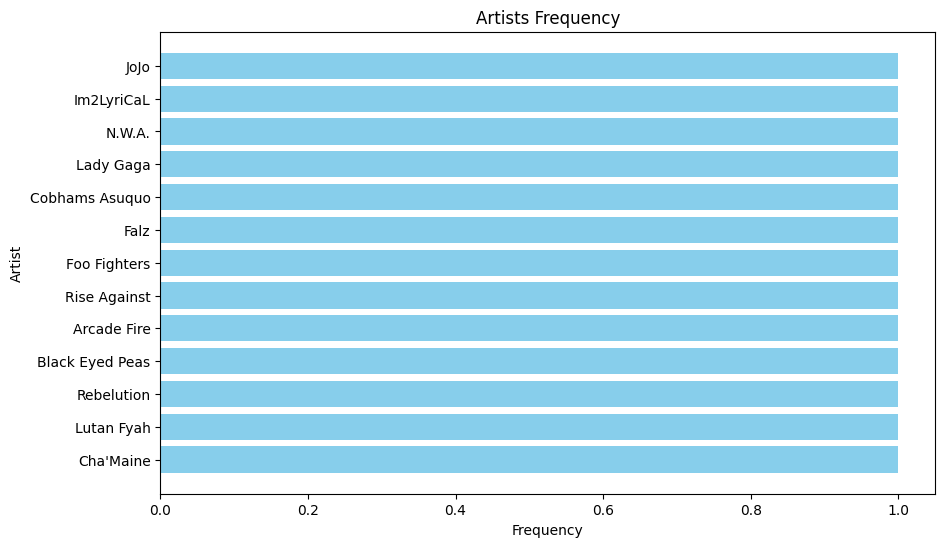

In [14]:
import matplotlib.pyplot as plt

# Given data
artists = [
    'JoJo', 'Im2LyriCaL', 'N.W.A.', 'Lady Gaga', 
    'Cobhams Asuquo', 'Falz', 'Foo Fighters', 
    'Rise Against', 'Arcade Fire', 'Black Eyed Peas', 
    'Rebelution', 'Lutan Fyah', 'Cha\'Maine'
]
frequencies = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.barh(artists, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.title('Artists Frequency')
plt.gca().invert_yaxis()
plt.show()


In [4]:
len(all_links_blm)

14355

Expanding URLs:  32%|███▏      | 318/1000 [08:22<17:57,  1.58s/it]

An error occurred: HTTPSConnectionPool(host='www.ninakristoffersonsbillieholidaystory.com', port=443): Max retries exceeded with url: /home/donate/ (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)')))


Expanding URLs:  32%|███▏      | 321/1000 [08:27<18:26,  1.63s/it]

An error occurred: HTTPSConnectionPool(host='www.ninakristoffersonsbillieholidaystory.com', port=443): Max retries exceeded with url: /home/donate/ (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)')))


Expanding URLs:  52%|█████▎    | 525/1000 [13:49<12:08,  1.53s/it]

An error occurred: HTTPSConnectionPool(host='www.givingapurposepodcast.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x76c9f4510bb0>: Failed to establish a new connection: [Errno -2] Name or service not known'))


Expanding URLs:  61%|██████    | 608/1000 [17:09<2:16:47, 20.94s/it]

An error occurred: HTTPSConnectionPool(host='t.co', port=443): Max retries exceeded with url: /JB7QFgf8Sy (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)')))


Getting Release Years:   0%|          | 2/815 [00:00<04:11,  3.24it/s]

Error: 404


Getting Release Years:   0%|          | 3/815 [00:00<03:55,  3.44it/s]

Error: 404


Getting Release Years:   1%|          | 5/815 [00:01<03:41,  3.66it/s]

Error: 404


Getting Release Years:   1%|          | 6/815 [00:01<03:37,  3.71it/s]

Error: 404


Getting Release Years:   1%|          | 9/815 [00:02<03:41,  3.63it/s]

Error: 404


Getting Release Years:   1%|▏         | 12/815 [00:03<03:42,  3.60it/s]

Error: 404


Getting Release Years:   2%|▏         | 13/815 [00:03<03:38,  3.68it/s]

Error: 404


Getting Release Years:   2%|▏         | 14/815 [00:03<03:35,  3.72it/s]

Error: 404


Getting Release Years:   2%|▏         | 16/815 [00:04<03:41,  3.60it/s]

Error: 404


Getting Release Years:   2%|▏         | 17/815 [00:04<03:37,  3.67it/s]

Error: 404


Getting Release Years:   2%|▏         | 19/815 [00:05<03:40,  3.61it/s]

Error: 404


Getting Release Years:   3%|▎         | 22/815 [00:06<03:35,  3.69it/s]

Error: 404


Getting Release Years:   3%|▎         | 25/815 [00:06<03:31,  3.73it/s]

Error: 404


Getting Release Years:   3%|▎         | 26/815 [00:07<03:39,  3.60it/s]

Error: 404


Getting Release Years:   3%|▎         | 28/815 [00:07<03:41,  3.56it/s]

Error: 404


Getting Release Years:   4%|▎         | 29/815 [00:08<03:36,  3.63it/s]

Error: 404


Getting Release Years:   4%|▍         | 31/815 [00:08<03:46,  3.46it/s]

Error: 404


Getting Release Years:   4%|▍         | 32/815 [00:08<03:36,  3.62it/s]

Error: 400


Getting Release Years:   4%|▍         | 34/815 [00:09<03:31,  3.69it/s]

Error: 404


Getting Release Years:   4%|▍         | 36/815 [00:09<03:26,  3.78it/s]

Error: 400


Getting Release Years:   5%|▍         | 37/815 [00:10<03:25,  3.79it/s]

Error: 404


Getting Release Years:   5%|▍         | 38/815 [00:10<03:21,  3.85it/s]

Error: 400


Getting Release Years:   5%|▍         | 39/815 [00:10<03:24,  3.80it/s]

Error: 404


Getting Release Years:   5%|▌         | 41/815 [00:11<03:26,  3.75it/s]

Error: 404


Getting Release Years:   6%|▌         | 45/815 [00:12<03:40,  3.49it/s]

Error: 404


Getting Release Years:   6%|▌         | 48/815 [00:13<03:45,  3.40it/s]

Error: 404


Getting Release Years:   6%|▌         | 49/815 [00:13<03:42,  3.45it/s]

Error: 404


Getting Release Years:   6%|▋         | 52/815 [00:14<03:39,  3.48it/s]

Error: 404


Getting Release Years:   7%|▋         | 54/815 [00:15<03:30,  3.61it/s]

Error: 404


Getting Release Years:   7%|▋         | 56/815 [00:15<03:27,  3.65it/s]

Error: 404


Getting Release Years:   7%|▋         | 57/815 [00:15<03:25,  3.69it/s]

Error: 404


Getting Release Years:   7%|▋         | 59/815 [00:16<03:25,  3.68it/s]

Error: 404


Getting Release Years:   7%|▋         | 61/815 [00:16<03:34,  3.52it/s]

Error: 404


Getting Release Years:   8%|▊         | 63/815 [00:17<03:28,  3.62it/s]

Error: 404


Getting Release Years:   8%|▊         | 64/815 [00:17<03:25,  3.66it/s]

Error: 404


Getting Release Years:   8%|▊         | 67/815 [00:18<03:19,  3.75it/s]

Error: 404


Getting Release Years:   8%|▊         | 68/815 [00:18<03:15,  3.81it/s]

Error: 400


Getting Release Years:   9%|▊         | 71/815 [00:19<03:30,  3.54it/s]

Error: 404


Getting Release Years:   9%|▉         | 73/815 [00:20<03:24,  3.63it/s]

Error: 404


Getting Release Years:   9%|▉         | 76/815 [00:21<03:22,  3.64it/s]

Error: 404


Getting Release Years:  10%|▉         | 78/815 [00:21<03:20,  3.68it/s]

Error: 404


Getting Release Years:  10%|▉         | 79/815 [00:21<03:18,  3.72it/s]

Error: 404


Getting Release Years:  10%|▉         | 80/815 [00:22<03:17,  3.72it/s]

Error: 404


Getting Release Years:  10%|▉         | 81/815 [00:22<03:20,  3.66it/s]

Error: 404


Getting Release Years:  10%|█         | 82/815 [00:22<03:20,  3.66it/s]

Error: 404


Getting Release Years:  10%|█         | 83/815 [00:23<03:23,  3.60it/s]

Error: 400


Getting Release Years:  10%|█         | 84/815 [00:23<03:24,  3.57it/s]

Error: 400


Getting Release Years:  10%|█         | 85/815 [00:23<03:22,  3.60it/s]

Error: 404


Getting Release Years:  11%|█         | 86/815 [00:23<03:22,  3.59it/s]

Error: 404


Getting Release Years:  11%|█         | 87/815 [00:24<03:23,  3.57it/s]

Error: 404


Getting Release Years:  11%|█         | 88/815 [00:24<03:19,  3.65it/s]

Error: 404


Getting Release Years:  11%|█         | 89/815 [00:24<03:19,  3.65it/s]

Error: 404


Getting Release Years:  11%|█         | 90/815 [00:24<03:15,  3.70it/s]

Error: 400


Getting Release Years:  11%|█▏        | 92/815 [00:25<03:14,  3.72it/s]

Error: 404


Getting Release Years:  12%|█▏        | 94/815 [00:26<03:22,  3.57it/s]

Error: 404


Getting Release Years:  12%|█▏        | 95/815 [00:26<03:23,  3.53it/s]

Error: 404


Getting Release Years:  12%|█▏        | 97/815 [00:26<03:17,  3.63it/s]

Error: 404


Getting Release Years:  12%|█▏        | 98/815 [00:27<03:15,  3.67it/s]

Error: 404


Getting Release Years:  12%|█▏        | 100/815 [00:27<03:22,  3.54it/s]

Error: 404


Getting Release Years:  12%|█▏        | 101/815 [00:27<03:16,  3.63it/s]

Error: 404


Getting Release Years:  13%|█▎        | 102/815 [00:28<03:13,  3.69it/s]

Error: 400


Getting Release Years:  13%|█▎        | 103/815 [00:28<03:13,  3.68it/s]

Error: 400


Getting Release Years:  13%|█▎        | 104/815 [00:28<03:10,  3.72it/s]

Error: 400


Getting Release Years:  13%|█▎        | 105/815 [00:29<03:20,  3.54it/s]

Error: 404


Getting Release Years:  13%|█▎        | 106/815 [00:29<03:16,  3.62it/s]

Error: 400


Getting Release Years:  13%|█▎        | 107/815 [00:29<03:15,  3.61it/s]

Error: 400


Getting Release Years:  13%|█▎        | 109/815 [00:30<03:28,  3.38it/s]

Error: 404


Getting Release Years:  13%|█▎        | 110/815 [00:30<03:22,  3.48it/s]

Error: 404


Getting Release Years:  14%|█▎        | 111/815 [00:30<03:18,  3.54it/s]

Error: 404


Getting Release Years:  14%|█▎        | 112/815 [00:31<03:16,  3.57it/s]

Error: 404


Getting Release Years:  14%|█▍        | 116/815 [00:32<03:10,  3.66it/s]

Error: 404


Getting Release Years:  14%|█▍        | 118/815 [00:32<03:26,  3.37it/s]

Error: 404


Getting Release Years:  15%|█▍        | 119/815 [00:33<03:20,  3.46it/s]

Error: 404


Getting Release Years:  15%|█▍        | 121/815 [00:33<03:16,  3.53it/s]

Error: 404


Getting Release Years:  15%|█▌        | 123/815 [00:34<03:11,  3.61it/s]

Error: 404


Getting Release Years:  15%|█▌        | 125/815 [00:34<03:08,  3.66it/s]

Error: 400


Getting Release Years:  15%|█▌        | 126/815 [00:35<03:04,  3.73it/s]

Error: 404


Getting Release Years:  16%|█▌        | 127/815 [00:35<03:05,  3.72it/s]

Error: 404


Getting Release Years:  16%|█▌        | 128/815 [00:35<03:03,  3.74it/s]

Error: 404


Getting Release Years:  16%|█▌        | 130/815 [00:36<03:13,  3.53it/s]

Error: 404


Getting Release Years:  16%|█▋        | 133/815 [00:36<03:03,  3.71it/s]

Error: 400


Getting Release Years:  16%|█▋        | 134/815 [00:37<02:58,  3.81it/s]

Error: 400


Getting Release Years:  17%|█▋        | 135/815 [00:37<03:01,  3.75it/s]

Error: 404


Getting Release Years:  17%|█▋        | 137/815 [00:37<03:03,  3.69it/s]

Error: 404


Getting Release Years:  17%|█▋        | 140/815 [00:38<03:03,  3.67it/s]

Error: 404


Getting Release Years:  17%|█▋        | 141/815 [00:39<03:02,  3.70it/s]

Error: 404


Getting Release Years:  18%|█▊        | 146/815 [00:40<03:06,  3.59it/s]

Error: 404


Getting Release Years:  18%|█▊        | 148/815 [00:41<03:11,  3.48it/s]

Error: 400


Getting Release Years:  18%|█▊        | 149/815 [00:41<03:06,  3.57it/s]

Error: 404


Getting Release Years:  19%|█▊        | 151/815 [00:41<03:06,  3.55it/s]

Error: 404


Getting Release Years:  19%|█▊        | 152/815 [00:42<03:00,  3.68it/s]

Error: 400


Getting Release Years:  19%|█▉        | 153/815 [00:42<03:05,  3.56it/s]

Error: 404


Getting Release Years:  19%|█▉        | 154/815 [00:42<03:04,  3.58it/s]

Error: 404


Getting Release Years:  19%|█▉        | 156/815 [00:43<02:59,  3.66it/s]

Error: 400


Getting Release Years:  19%|█▉        | 157/815 [00:43<02:57,  3.70it/s]

Error: 404


Getting Release Years:  20%|█▉        | 159/815 [00:44<03:04,  3.55it/s]

Error: 404


Getting Release Years:  20%|█▉        | 161/815 [00:44<03:00,  3.63it/s]

Error: 404


Getting Release Years:  20%|█▉        | 162/815 [00:44<03:01,  3.60it/s]

Error: 404


Getting Release Years:  20%|██        | 163/815 [00:45<02:59,  3.63it/s]

Error: 404


Getting Release Years:  20%|██        | 165/815 [00:45<02:58,  3.64it/s]

Error: 404


Getting Release Years:  20%|██        | 166/815 [00:46<02:57,  3.66it/s]

Error: 404


Getting Release Years:  20%|██        | 167/815 [00:46<03:00,  3.59it/s]

Error: 404


Getting Release Years:  21%|██        | 168/815 [00:46<03:01,  3.56it/s]

Error: 404


Getting Release Years:  21%|██        | 169/815 [00:46<03:10,  3.39it/s]

Error: 404


Getting Release Years:  21%|██        | 171/815 [00:47<03:17,  3.26it/s]

Error: 404


Getting Release Years:  21%|██        | 172/815 [00:47<03:07,  3.44it/s]

Error: 404


Getting Release Years:  21%|██        | 173/815 [00:48<03:07,  3.43it/s]

Error: 404


Getting Release Years:  21%|██▏       | 174/815 [00:48<03:05,  3.46it/s]

Error: 400


Getting Release Years:  21%|██▏       | 175/815 [00:48<02:59,  3.57it/s]

Error: 400


Getting Release Years:  22%|██▏       | 176/815 [00:48<02:57,  3.59it/s]

Error: 404


Getting Release Years:  22%|██▏       | 177/815 [00:49<02:57,  3.60it/s]

Error: 404


Getting Release Years:  22%|██▏       | 179/815 [00:49<03:03,  3.47it/s]

Error: 400


Getting Release Years:  22%|██▏       | 181/815 [00:50<03:04,  3.43it/s]

Error: 404


Getting Release Years:  22%|██▏       | 183/815 [00:50<02:57,  3.57it/s]

Error: 404


Getting Release Years:  23%|██▎       | 185/815 [00:51<02:53,  3.63it/s]

Error: 404


Getting Release Years:  23%|██▎       | 186/815 [00:51<02:55,  3.59it/s]

Error: 404


Getting Release Years:  23%|██▎       | 189/815 [00:52<02:53,  3.62it/s]

Error: 404


Getting Release Years:  23%|██▎       | 190/815 [00:52<02:48,  3.71it/s]

Error: 400


Getting Release Years:  23%|██▎       | 191/815 [00:53<02:52,  3.63it/s]

Error: 404


Getting Release Years:  24%|██▎       | 192/815 [00:53<02:50,  3.65it/s]

Error: 404


Getting Release Years:  24%|██▍       | 195/815 [00:54<02:51,  3.62it/s]

Error: 404


Getting Release Years:  24%|██▍       | 198/815 [00:55<02:49,  3.64it/s]

Error: 404


Getting Release Years:  24%|██▍       | 199/815 [00:55<02:47,  3.68it/s]

Error: 404


Getting Release Years:  25%|██▍       | 200/815 [00:55<02:47,  3.68it/s]

Error: 404


Getting Release Years:  25%|██▍       | 202/815 [00:56<02:45,  3.70it/s]

Error: 404


Getting Release Years:  25%|██▌       | 204/815 [00:56<02:50,  3.58it/s]

Error: 404


Getting Release Years:  25%|██▌       | 205/815 [00:57<02:47,  3.64it/s]

Error: 404


Getting Release Years:  25%|██▌       | 207/815 [00:57<02:51,  3.55it/s]

Error: 404


Getting Release Years:  26%|██▌       | 209/815 [00:58<02:47,  3.61it/s]

Error: 404


Getting Release Years:  26%|██▌       | 210/815 [00:58<02:45,  3.66it/s]

Error: 404


Getting Release Years:  26%|██▌       | 212/815 [00:59<02:54,  3.46it/s]

Error: 404


Getting Release Years:  26%|██▌       | 213/815 [00:59<02:47,  3.59it/s]

Error: 404


Getting Release Years:  27%|██▋       | 218/815 [01:00<02:43,  3.65it/s]

Error: 404


Getting Release Years:  27%|██▋       | 219/815 [01:00<02:49,  3.51it/s]

Error: 404


Getting Release Years:  27%|██▋       | 220/815 [01:01<02:47,  3.56it/s]

Error: 404


Getting Release Years:  27%|██▋       | 221/815 [01:01<02:47,  3.55it/s]

Error: 404


Getting Release Years:  27%|██▋       | 223/815 [01:02<02:45,  3.57it/s]

Error: 404


Getting Release Years:  28%|██▊       | 226/815 [01:02<02:47,  3.52it/s]

Error: 404


Getting Release Years:  28%|██▊       | 227/815 [01:03<02:42,  3.61it/s]

Error: 404


Getting Release Years:  28%|██▊       | 228/815 [01:03<02:42,  3.62it/s]

Error: 404


Getting Release Years:  30%|██▉       | 243/815 [01:07<02:36,  3.65it/s]

Error: 404


Getting Release Years:  30%|███       | 246/815 [01:08<02:41,  3.51it/s]

Error: 404


Getting Release Years:  31%|███       | 249/815 [01:09<02:32,  3.72it/s]

Error: 400


Getting Release Years:  31%|███       | 250/815 [01:09<02:36,  3.61it/s]

Error: 400


Getting Release Years:  31%|███       | 251/815 [01:09<02:35,  3.63it/s]

Error: 404


Getting Release Years:  31%|███       | 252/815 [01:10<02:35,  3.63it/s]

Error: 404


Getting Release Years:  31%|███       | 253/815 [01:10<02:33,  3.65it/s]

Error: 404


Getting Release Years:  31%|███       | 254/815 [01:10<02:33,  3.66it/s]

Error: 404


Getting Release Years:  31%|███▏      | 255/815 [01:11<02:36,  3.58it/s]

Error: 404


Getting Release Years:  31%|███▏      | 256/815 [01:11<02:34,  3.62it/s]

Error: 404


Getting Release Years:  32%|███▏      | 257/815 [01:11<02:35,  3.59it/s]

Error: 404


Getting Release Years:  32%|███▏      | 259/815 [01:12<02:42,  3.42it/s]

Error: 404


Getting Release Years:  32%|███▏      | 260/815 [01:12<02:36,  3.55it/s]

Error: 404


Getting Release Years:  32%|███▏      | 261/815 [01:12<02:34,  3.59it/s]

Error: 404


Getting Release Years:  32%|███▏      | 263/815 [01:13<02:35,  3.54it/s]

Error: 404


Getting Release Years:  32%|███▏      | 264/815 [01:13<02:41,  3.40it/s]

Error: 404


Getting Release Years:  33%|███▎      | 265/815 [01:13<02:39,  3.44it/s]

Error: 404


Getting Release Years:  33%|███▎      | 267/815 [01:14<02:38,  3.45it/s]

Error: 404


Getting Release Years:  33%|███▎      | 269/815 [01:15<02:44,  3.32it/s]

Error: 404


Getting Release Years:  33%|███▎      | 272/815 [01:15<02:37,  3.45it/s]

Error: 404


Getting Release Years:  34%|███▎      | 274/815 [01:16<02:31,  3.58it/s]

Error: 404


Getting Release Years:  34%|███▎      | 275/815 [01:16<02:27,  3.66it/s]

Error: 404


Getting Release Years:  34%|███▍      | 276/815 [01:17<02:27,  3.65it/s]

Error: 404


Getting Release Years:  34%|███▍      | 277/815 [01:17<02:35,  3.46it/s]

Error: 404


Getting Release Years:  34%|███▍      | 278/815 [01:17<02:33,  3.51it/s]

Error: 404


Getting Release Years:  34%|███▍      | 280/815 [01:18<02:35,  3.44it/s]

Error: 404


Getting Release Years:  34%|███▍      | 281/815 [01:18<02:30,  3.54it/s]

Error: 404


Getting Release Years:  35%|███▍      | 283/815 [01:19<02:32,  3.48it/s]

Error: 404


Getting Release Years:  35%|███▌      | 287/815 [01:20<02:32,  3.46it/s]

Error: 400


Getting Release Years:  35%|███▌      | 288/815 [01:20<02:27,  3.57it/s]

Error: 404


Getting Release Years:  35%|███▌      | 289/815 [01:20<02:30,  3.49it/s]

Error: 404


Getting Release Years:  36%|███▌      | 291/815 [01:21<02:29,  3.52it/s]

Error: 404


Getting Release Years:  36%|███▌      | 292/815 [01:21<02:26,  3.56it/s]

Error: 404


Getting Release Years:  36%|███▌      | 293/815 [01:21<02:24,  3.61it/s]

Error: 404


Getting Release Years:  36%|███▋      | 296/815 [01:22<02:22,  3.64it/s]

Error: 404


Getting Release Years:  37%|███▋      | 298/815 [01:23<02:23,  3.60it/s]

Error: 404


Getting Release Years:  37%|███▋      | 303/815 [01:24<02:20,  3.63it/s]

Error: 404


Getting Release Years:  37%|███▋      | 305/815 [01:25<02:22,  3.58it/s]

Error: 404


Getting Release Years:  38%|███▊      | 307/815 [01:25<02:18,  3.66it/s]

Error: 404


Getting Release Years:  38%|███▊      | 308/815 [01:26<02:16,  3.72it/s]

Error: 404


Getting Release Years:  38%|███▊      | 309/815 [01:26<02:15,  3.73it/s]

Error: 400


Getting Release Years:  38%|███▊      | 310/815 [01:26<02:14,  3.75it/s]

Error: 400


Getting Release Years:  38%|███▊      | 312/815 [01:27<02:18,  3.63it/s]

Error: 400


Getting Release Years:  38%|███▊      | 313/815 [01:27<02:16,  3.68it/s]

Error: 404


Getting Release Years:  39%|███▉      | 317/815 [01:28<02:14,  3.70it/s]

Error: 404


Getting Release Years:  39%|███▉      | 320/815 [01:29<02:16,  3.63it/s]

Error: 404


Getting Release Years:  40%|███▉      | 323/815 [01:30<02:16,  3.60it/s]

Error: 404


Getting Release Years:  40%|███▉      | 324/815 [01:30<02:14,  3.64it/s]

Error: 404


Getting Release Years:  40%|███▉      | 325/815 [01:30<02:14,  3.65it/s]

Error: 404


Getting Release Years:  40%|████      | 326/815 [01:31<02:14,  3.63it/s]

Error: 404


Getting Release Years:  40%|████      | 327/815 [01:31<02:14,  3.64it/s]

Error: 404


Getting Release Years:  40%|████      | 328/815 [01:31<02:14,  3.63it/s]

Error: 404


Getting Release Years:  40%|████      | 329/815 [01:31<02:20,  3.46it/s]

Error: 404


Getting Release Years:  41%|████      | 331/815 [01:32<02:20,  3.44it/s]

Error: 404


Getting Release Years:  41%|████      | 332/815 [01:32<02:16,  3.53it/s]

Error: 404


Getting Release Years:  41%|████      | 335/815 [01:33<02:13,  3.59it/s]

Error: 404


Getting Release Years:  41%|████      | 336/815 [01:33<02:12,  3.62it/s]

Error: 404


Getting Release Years:  41%|████▏     | 337/815 [01:34<02:13,  3.58it/s]

Error: 404


Getting Release Years:  42%|████▏     | 339/815 [01:34<02:12,  3.60it/s]

Error: 400


Getting Release Years:  42%|████▏     | 340/815 [01:34<02:08,  3.71it/s]

Error: 400


Getting Release Years:  42%|████▏     | 341/815 [01:35<02:13,  3.56it/s]

Error: 404


Getting Release Years:  42%|████▏     | 342/815 [01:35<02:13,  3.54it/s]

Error: 404


Getting Release Years:  42%|████▏     | 344/815 [01:36<02:12,  3.56it/s]

Error: 404


Getting Release Years:  42%|████▏     | 345/815 [01:36<02:08,  3.67it/s]

Error: 404


Getting Release Years:  42%|████▏     | 346/815 [01:36<02:07,  3.68it/s]

Error: 404


Getting Release Years:  43%|████▎     | 348/815 [01:37<02:06,  3.68it/s]

Error: 404


Getting Release Years:  43%|████▎     | 349/815 [01:37<02:05,  3.72it/s]

Error: 404


Getting Release Years:  43%|████▎     | 353/815 [01:38<02:10,  3.53it/s]

Error: 404


Getting Release Years:  43%|████▎     | 354/815 [01:38<02:07,  3.60it/s]

Error: 404


Getting Release Years:  44%|████▎     | 355/815 [01:39<02:08,  3.57it/s]

Error: 404


Getting Release Years:  44%|████▎     | 356/815 [01:39<02:07,  3.60it/s]

Error: 404


Getting Release Years:  44%|████▍     | 359/815 [01:40<02:04,  3.66it/s]

Error: 404


Getting Release Years:  44%|████▍     | 360/815 [01:40<02:01,  3.74it/s]

Error: 400


Getting Release Years:  44%|████▍     | 361/815 [01:40<02:01,  3.75it/s]

Error: 400


Getting Release Years:  44%|████▍     | 362/815 [01:41<02:04,  3.65it/s]

Error: 404


Getting Release Years:  45%|████▍     | 363/815 [01:41<02:04,  3.64it/s]

Error: 404


Getting Release Years:  45%|████▍     | 364/815 [01:41<02:08,  3.52it/s]

Error: 404


Getting Release Years:  45%|████▍     | 365/815 [01:41<02:06,  3.55it/s]

Error: 400


Getting Release Years:  45%|████▍     | 366/815 [01:42<02:04,  3.62it/s]

Error: 400


Getting Release Years:  45%|████▌     | 368/815 [01:42<02:01,  3.67it/s]

Error: 400


Getting Release Years:  45%|████▌     | 369/815 [01:43<01:59,  3.73it/s]

Error: 404


Getting Release Years:  45%|████▌     | 370/815 [01:43<02:01,  3.67it/s]

Error: 400


Getting Release Years:  46%|████▌     | 372/815 [01:43<02:06,  3.52it/s]

Error: 404


Getting Release Years:  46%|████▌     | 375/815 [01:44<02:03,  3.57it/s]

Error: 404


Getting Release Years:  46%|████▋     | 377/815 [01:45<02:01,  3.60it/s]

Error: 404


Getting Release Years:  46%|████▋     | 378/815 [01:45<02:05,  3.48it/s]

Error: 404


Getting Release Years:  47%|████▋     | 380/815 [01:46<02:03,  3.53it/s]

Error: 404


Getting Release Years:  47%|████▋     | 382/815 [01:46<02:03,  3.50it/s]

Error: 404


Getting Release Years:  47%|████▋     | 384/815 [01:47<02:00,  3.56it/s]

Error: 404


Getting Release Years:  47%|████▋     | 385/815 [01:47<01:56,  3.68it/s]

Error: 400


Getting Release Years:  48%|████▊     | 388/815 [01:48<02:00,  3.55it/s]

Error: 404


Getting Release Years:  48%|████▊     | 389/815 [01:48<02:00,  3.54it/s]

Error: 404


Getting Release Years:  48%|████▊     | 390/815 [01:48<01:57,  3.62it/s]

Error: 400


Getting Release Years:  48%|████▊     | 391/815 [01:49<01:57,  3.61it/s]

Error: 400


Getting Release Years:  48%|████▊     | 392/815 [01:49<01:58,  3.57it/s]

Error: 404


Getting Release Years:  48%|████▊     | 393/815 [01:49<01:59,  3.52it/s]

Error: 404


Getting Release Years:  48%|████▊     | 395/815 [01:50<01:58,  3.56it/s]

Error: 404


Getting Release Years:  49%|████▊     | 397/815 [01:50<01:56,  3.59it/s]

Error: 404


Getting Release Years:  49%|████▉     | 400/815 [01:51<01:56,  3.57it/s]

Error: 404


Getting Release Years:  49%|████▉     | 401/815 [01:52<01:54,  3.63it/s]

Error: 404


Getting Release Years:  50%|████▉     | 405/815 [01:53<01:51,  3.69it/s]

Error: 404


Getting Release Years:  50%|████▉     | 406/815 [01:53<01:49,  3.74it/s]

Error: 404


Getting Release Years:  50%|████▉     | 407/815 [01:53<01:51,  3.67it/s]

Error: 404


Getting Release Years:  50%|█████     | 408/815 [01:53<01:50,  3.69it/s]

Error: 404


Getting Release Years:  50%|█████     | 409/815 [01:54<01:52,  3.61it/s]

Error: 404


Getting Release Years:  50%|█████     | 410/815 [01:54<01:54,  3.54it/s]

Error: 404


Getting Release Years:  50%|█████     | 411/815 [01:54<01:56,  3.46it/s]

Error: 404


Getting Release Years:  51%|█████     | 412/815 [01:55<01:54,  3.53it/s]

Error: 404


Getting Release Years:  51%|█████     | 414/815 [01:55<01:48,  3.70it/s]

Error: 404


Getting Release Years:  51%|█████     | 416/815 [01:56<01:50,  3.62it/s]

Error: 404


Getting Release Years:  51%|█████▏    | 418/815 [01:56<01:46,  3.72it/s]

Error: 404


Getting Release Years:  52%|█████▏    | 420/815 [01:57<01:48,  3.65it/s]

Error: 404


Getting Release Years:  52%|█████▏    | 421/815 [01:57<01:46,  3.70it/s]

Error: 404


Getting Release Years:  52%|█████▏    | 422/815 [01:57<01:49,  3.57it/s]

Error: 404


Getting Release Years:  52%|█████▏    | 424/815 [01:58<01:44,  3.73it/s]

Error: 404


Getting Release Years:  52%|█████▏    | 425/815 [01:58<01:49,  3.57it/s]

Error: 404


Getting Release Years:  52%|█████▏    | 426/815 [01:58<01:45,  3.69it/s]

Error: 404


Getting Release Years:  52%|█████▏    | 427/815 [01:59<01:43,  3.74it/s]

Error: 404


Getting Release Years:  53%|█████▎    | 428/815 [01:59<01:40,  3.85it/s]

Error: 400


Getting Release Years:  53%|█████▎    | 429/815 [01:59<01:39,  3.86it/s]

Error: 400


Getting Release Years:  53%|█████▎    | 432/815 [02:00<01:44,  3.66it/s]

Error: 404


Getting Release Years:  53%|█████▎    | 435/815 [02:01<01:43,  3.69it/s]

Error: 404


Getting Release Years:  53%|█████▎    | 436/815 [02:01<01:41,  3.73it/s]

Error: 404


Getting Release Years:  54%|█████▎    | 437/815 [02:01<01:40,  3.77it/s]

Error: 404


Getting Release Years:  54%|█████▍    | 441/815 [02:02<01:41,  3.69it/s]

Error: 404


Getting Release Years:  54%|█████▍    | 444/815 [02:03<01:38,  3.75it/s]

Error: 404


Getting Release Years:  55%|█████▍    | 445/815 [02:04<01:38,  3.77it/s]

Error: 404


Getting Release Years:  55%|█████▍    | 448/815 [02:04<01:36,  3.79it/s]

Error: 400


Getting Release Years:  55%|█████▌    | 449/815 [02:05<01:35,  3.83it/s]

Error: 404


Getting Release Years:  55%|█████▌    | 450/815 [02:05<01:36,  3.80it/s]

Error: 404


Getting Release Years:  55%|█████▌    | 452/815 [02:05<01:34,  3.85it/s]

Error: 404


Getting Release Years:  56%|█████▌    | 454/815 [02:06<01:35,  3.78it/s]

Error: 404


Getting Release Years:  56%|█████▌    | 455/815 [02:06<01:35,  3.79it/s]

Error: 404


Getting Release Years:  56%|█████▌    | 456/815 [02:06<01:35,  3.76it/s]

Error: 404


Getting Release Years:  56%|█████▌    | 458/815 [02:07<01:45,  3.39it/s]

Error: 404


Getting Release Years:  56%|█████▋    | 460/815 [02:08<01:36,  3.66it/s]

Error: 400


Getting Release Years:  57%|█████▋    | 461/815 [02:08<01:35,  3.72it/s]

Error: 404


Getting Release Years:  57%|█████▋    | 462/815 [02:08<01:35,  3.70it/s]

Error: 404


Getting Release Years:  57%|█████▋    | 463/815 [02:08<01:36,  3.65it/s]

Error: 404


Getting Release Years:  57%|█████▋    | 464/815 [02:09<01:36,  3.62it/s]

Error: 404


Getting Release Years:  57%|█████▋    | 468/815 [02:10<01:35,  3.63it/s]

Error: 404


Getting Release Years:  59%|█████▉    | 480/815 [02:13<01:27,  3.81it/s]

Error: 404


Getting Release Years:  59%|█████▉    | 481/815 [02:13<01:27,  3.83it/s]

Error: 404


Getting Release Years:  59%|█████▉    | 483/815 [02:14<01:26,  3.82it/s]

Error: 404


Getting Release Years:  59%|█████▉    | 484/815 [02:14<01:26,  3.81it/s]

Error: 404


Getting Release Years:  60%|█████▉    | 487/815 [02:15<01:25,  3.82it/s]

Error: 404


Getting Release Years:  60%|█████▉    | 488/815 [02:15<01:25,  3.84it/s]

Error: 404


Getting Release Years:  60%|██████    | 489/815 [02:15<01:24,  3.85it/s]

Error: 404


Getting Release Years:  60%|██████    | 490/815 [02:16<01:23,  3.88it/s]

Error: 404


Getting Release Years:  60%|██████    | 491/815 [02:16<01:23,  3.86it/s]

Error: 404


Getting Release Years:  60%|██████    | 492/815 [02:16<01:23,  3.87it/s]

Error: 404


Getting Release Years:  60%|██████    | 493/815 [02:16<01:23,  3.85it/s]

Error: 404


Getting Release Years:  61%|██████    | 494/815 [02:17<01:23,  3.85it/s]

Error: 404


Getting Release Years:  61%|██████    | 496/815 [02:17<01:23,  3.82it/s]

Error: 404


Getting Release Years:  61%|██████    | 498/815 [02:18<01:21,  3.87it/s]

Error: 404


Getting Release Years:  61%|██████    | 499/815 [02:18<01:21,  3.87it/s]

Error: 404


Getting Release Years:  62%|██████▏   | 504/815 [02:19<01:21,  3.81it/s]

Error: 404


Getting Release Years:  62%|██████▏   | 506/815 [02:20<01:22,  3.73it/s]

Error: 404


Getting Release Years:  62%|██████▏   | 508/815 [02:20<01:21,  3.77it/s]

Error: 404


Getting Release Years:  63%|██████▎   | 510/815 [02:21<01:22,  3.67it/s]

Error: 404


Getting Release Years:  63%|██████▎   | 511/815 [02:21<01:22,  3.70it/s]

Error: 404


Getting Release Years:  63%|██████▎   | 512/815 [02:21<01:21,  3.71it/s]

Error: 404


Getting Release Years:  63%|██████▎   | 513/815 [02:22<01:20,  3.77it/s]

Error: 404


Getting Release Years:  63%|██████▎   | 514/815 [02:22<01:24,  3.57it/s]

Error: 404


Getting Release Years:  63%|██████▎   | 516/815 [02:23<01:23,  3.57it/s]

Error: 404


Getting Release Years:  64%|██████▎   | 518/815 [02:23<01:21,  3.65it/s]

Error: 404


Getting Release Years:  64%|██████▎   | 519/815 [02:23<01:20,  3.69it/s]

Error: 404


Getting Release Years:  64%|██████▍   | 521/815 [02:24<01:21,  3.60it/s]

Error: 404


Getting Release Years:  64%|██████▍   | 522/815 [02:24<01:18,  3.75it/s]

Error: 400


Getting Release Years:  64%|██████▍   | 524/815 [02:25<01:18,  3.73it/s]

Error: 404


Getting Release Years:  64%|██████▍   | 525/815 [02:25<01:21,  3.56it/s]

Error: 404


Getting Release Years:  65%|██████▍   | 528/815 [02:26<01:18,  3.64it/s]

Error: 404


Getting Release Years:  65%|██████▍   | 529/815 [02:26<01:19,  3.62it/s]

Error: 404


Getting Release Years:  65%|██████▌   | 530/815 [02:26<01:17,  3.67it/s]

Error: 400


Getting Release Years:  65%|██████▌   | 531/815 [02:27<01:16,  3.70it/s]

Error: 404


Getting Release Years:  65%|██████▌   | 532/815 [02:27<01:16,  3.68it/s]

Error: 404


Getting Release Years:  65%|██████▌   | 533/815 [02:27<01:15,  3.76it/s]

Error: 404


Getting Release Years:  66%|██████▌   | 534/815 [02:27<01:15,  3.70it/s]

Error: 404


Getting Release Years:  66%|██████▌   | 535/815 [02:28<01:14,  3.78it/s]

Error: 404


Getting Release Years:  66%|██████▌   | 536/815 [02:28<01:13,  3.79it/s]

Error: 404


Getting Release Years:  66%|██████▌   | 538/815 [02:29<01:14,  3.72it/s]

Error: 404


Getting Release Years:  66%|██████▋   | 540/815 [02:29<01:15,  3.63it/s]

Error: 404


Getting Release Years:  66%|██████▋   | 541/815 [02:29<01:15,  3.63it/s]

Error: 404


Getting Release Years:  67%|██████▋   | 542/815 [02:30<01:15,  3.63it/s]

Error: 404


Getting Release Years:  67%|██████▋   | 543/815 [02:30<01:14,  3.68it/s]

Error: 404


Getting Release Years:  67%|██████▋   | 544/815 [02:30<01:13,  3.67it/s]

Error: 404


Getting Release Years:  67%|██████▋   | 545/815 [02:31<01:16,  3.53it/s]

Error: 404


Getting Release Years:  67%|██████▋   | 546/815 [02:31<01:16,  3.54it/s]

Error: 404


Getting Release Years:  67%|██████▋   | 549/815 [02:32<01:18,  3.37it/s]

Error: 404


Getting Release Years:  67%|██████▋   | 550/815 [02:32<01:16,  3.47it/s]

Error: 404


Getting Release Years:  68%|██████▊   | 551/815 [02:32<01:14,  3.53it/s]

Error: 404


Getting Release Years:  68%|██████▊   | 552/815 [02:32<01:12,  3.61it/s]

Error: 404


Getting Release Years:  68%|██████▊   | 555/815 [02:33<01:12,  3.59it/s]

Error: 404


Getting Release Years:  68%|██████▊   | 556/815 [02:34<01:13,  3.51it/s]

Error: 404


Getting Release Years:  68%|██████▊   | 557/815 [02:34<01:12,  3.58it/s]

Error: 404


Getting Release Years:  68%|██████▊   | 558/815 [02:34<01:11,  3.60it/s]

Error: 404


Getting Release Years:  69%|██████▊   | 560/815 [02:35<01:15,  3.39it/s]

Error: 404


Getting Release Years:  69%|██████▉   | 561/815 [02:35<01:15,  3.38it/s]

Error: 404


Getting Release Years:  69%|██████▉   | 563/815 [02:36<01:12,  3.49it/s]

Error: 404


Getting Release Years:  69%|██████▉   | 564/815 [02:36<01:09,  3.60it/s]

Error: 404


Getting Release Years:  69%|██████▉   | 565/815 [02:36<01:10,  3.56it/s]

Error: 404


Getting Release Years:  70%|██████▉   | 570/815 [02:38<01:07,  3.61it/s]

Error: 404


Getting Release Years:  70%|███████   | 572/815 [02:38<01:07,  3.61it/s]

Error: 404


Getting Release Years:  70%|███████   | 573/815 [02:38<01:06,  3.66it/s]

Error: 404


Getting Release Years:  70%|███████   | 574/815 [02:39<01:05,  3.69it/s]

Error: 404


Getting Release Years:  71%|███████   | 576/815 [02:39<01:03,  3.74it/s]

Error: 404


Getting Release Years:  71%|███████▏  | 581/815 [02:41<01:03,  3.70it/s]

Error: 400


Getting Release Years:  71%|███████▏  | 582/815 [02:41<01:02,  3.76it/s]

Error: 404


Getting Release Years:  72%|███████▏  | 583/815 [02:41<01:01,  3.75it/s]

Error: 404


Getting Release Years:  72%|███████▏  | 584/815 [02:41<01:02,  3.71it/s]

Error: 404


Getting Release Years:  72%|███████▏  | 585/815 [02:42<01:01,  3.77it/s]

Error: 404


Getting Release Years:  72%|███████▏  | 586/815 [02:42<00:59,  3.83it/s]

Error: 400


Getting Release Years:  72%|███████▏  | 587/815 [02:42<00:59,  3.84it/s]

Error: 404


Getting Release Years:  72%|███████▏  | 590/815 [02:43<01:00,  3.71it/s]

Error: 404


Getting Release Years:  73%|███████▎  | 591/815 [02:43<01:02,  3.57it/s]

Error: 404


Getting Release Years:  73%|███████▎  | 593/815 [02:44<01:02,  3.55it/s]

Error: 404


Getting Release Years:  73%|███████▎  | 596/815 [02:45<01:01,  3.59it/s]

Error: 404


Getting Release Years:  73%|███████▎  | 597/815 [02:45<00:59,  3.63it/s]

Error: 404


Getting Release Years:  73%|███████▎  | 598/815 [02:45<00:58,  3.69it/s]

Error: 404


Getting Release Years:  73%|███████▎  | 599/815 [02:46<01:00,  3.56it/s]

Error: 404


Getting Release Years:  74%|███████▎  | 600/815 [02:46<01:02,  3.46it/s]

Error: 404


Getting Release Years:  74%|███████▎  | 601/815 [02:46<01:01,  3.47it/s]

Error: 404


Getting Release Years:  74%|███████▍  | 602/815 [02:47<01:32,  2.31it/s]

Error: 404


Getting Release Years:  74%|███████▍  | 603/815 [02:47<01:25,  2.49it/s]

Error: 404


Getting Release Years:  74%|███████▍  | 605/815 [02:48<01:09,  3.02it/s]

Error: 404


Getting Release Years:  74%|███████▍  | 606/815 [02:48<01:05,  3.20it/s]

Error: 404


Getting Release Years:  74%|███████▍  | 607/815 [02:48<01:02,  3.35it/s]

Error: 404


Getting Release Years:  75%|███████▍  | 609/815 [02:49<01:00,  3.41it/s]

Error: 404


Getting Release Years:  75%|███████▍  | 611/815 [02:49<00:57,  3.52it/s]

Error: 404


Getting Release Years:  75%|███████▌  | 612/815 [02:50<00:56,  3.62it/s]

Error: 404


Getting Release Years:  75%|███████▌  | 615/815 [02:51<00:54,  3.67it/s]

Error: 404


Getting Release Years:  76%|███████▌  | 616/815 [02:51<00:54,  3.62it/s]

Error: 404


Getting Release Years:  76%|███████▌  | 617/815 [02:51<00:53,  3.70it/s]

Error: 404


Getting Release Years:  76%|███████▌  | 618/815 [02:51<00:54,  3.60it/s]

Error: 404


Getting Release Years:  76%|███████▌  | 621/815 [02:52<00:52,  3.66it/s]

Error: 400


Getting Release Years:  76%|███████▋  | 622/815 [02:52<00:51,  3.71it/s]

Error: 400


Getting Release Years:  76%|███████▋  | 623/815 [02:53<00:50,  3.77it/s]

Error: 404


Getting Release Years:  77%|███████▋  | 625/815 [02:53<00:50,  3.74it/s]

Error: 404


Getting Release Years:  77%|███████▋  | 628/815 [02:54<00:50,  3.73it/s]

Error: 404


Getting Release Years:  77%|███████▋  | 630/815 [02:55<00:48,  3.79it/s]

Error: 404


Getting Release Years:  77%|███████▋  | 631/815 [02:55<00:49,  3.74it/s]

Error: 404


Getting Release Years:  78%|███████▊  | 632/815 [02:55<00:48,  3.78it/s]

Error: 404


Getting Release Years:  78%|███████▊  | 633/815 [02:55<00:50,  3.62it/s]

Error: 400


Getting Release Years:  78%|███████▊  | 634/815 [02:56<00:49,  3.66it/s]

Error: 404


Getting Release Years:  78%|███████▊  | 635/815 [02:56<00:47,  3.76it/s]

Error: 400


Getting Release Years:  78%|███████▊  | 636/815 [02:56<00:47,  3.77it/s]

Error: 404


Getting Release Years:  78%|███████▊  | 638/815 [02:57<00:48,  3.66it/s]

Error: 404


Getting Release Years:  79%|███████▊  | 641/815 [02:58<00:46,  3.73it/s]

Error: 404


Getting Release Years:  79%|███████▉  | 642/815 [02:58<00:46,  3.69it/s]

Error: 404


Getting Release Years:  79%|███████▉  | 647/815 [02:59<00:47,  3.57it/s]

Error: 404


Getting Release Years:  80%|████████  | 655/815 [03:02<00:43,  3.64it/s]

Error: 404


Getting Release Years:  80%|████████  | 656/815 [03:02<00:42,  3.70it/s]

Error: 404


Getting Release Years:  81%|████████  | 658/815 [03:02<00:45,  3.47it/s]

Error: 404


Getting Release Years:  81%|████████  | 659/815 [03:03<00:43,  3.56it/s]

Error: 404


Getting Release Years:  81%|████████  | 661/815 [03:03<00:42,  3.63it/s]

Error: 404


Getting Release Years:  81%|████████▏ | 663/815 [03:04<00:46,  3.24it/s]

Error: 400


Getting Release Years:  82%|████████▏ | 665/815 [03:04<00:42,  3.52it/s]

Error: 404


Getting Release Years:  82%|████████▏ | 666/815 [03:05<00:41,  3.63it/s]

Error: 404


Getting Release Years:  82%|████████▏ | 667/815 [03:05<00:39,  3.73it/s]

Error: 400


Getting Release Years:  82%|████████▏ | 668/815 [03:05<00:38,  3.82it/s]

Error: 400


Getting Release Years:  82%|████████▏ | 669/815 [03:05<00:38,  3.84it/s]

Error: 404


Getting Release Years:  82%|████████▏ | 670/815 [03:06<00:37,  3.88it/s]

Error: 404


Getting Release Years:  82%|████████▏ | 672/815 [03:06<00:37,  3.84it/s]

Error: 400


Getting Release Years:  83%|████████▎ | 673/815 [03:06<00:36,  3.90it/s]

Error: 400


Getting Release Years:  83%|████████▎ | 674/815 [03:07<00:36,  3.89it/s]

Error: 404


Getting Release Years:  83%|████████▎ | 675/815 [03:07<00:39,  3.53it/s]

Error: 404


Getting Release Years:  83%|████████▎ | 676/815 [03:07<00:38,  3.60it/s]

Error: 404


Getting Release Years:  83%|████████▎ | 677/815 [03:08<00:37,  3.71it/s]

Error: 404


Getting Release Years:  83%|████████▎ | 679/815 [03:08<00:36,  3.70it/s]

Error: 404


Getting Release Years:  84%|████████▎ | 681/815 [03:09<00:35,  3.73it/s]

Error: 404


Getting Release Years:  84%|████████▎ | 682/815 [03:09<00:35,  3.74it/s]

Error: 404


Getting Release Years:  84%|████████▍ | 685/815 [03:10<00:35,  3.63it/s]

Error: 404


Getting Release Years:  84%|████████▍ | 687/815 [03:10<00:34,  3.74it/s]

Error: 404


Getting Release Years:  84%|████████▍ | 688/815 [03:11<00:33,  3.76it/s]

Error: 404


Getting Release Years:  85%|████████▍ | 689/815 [03:11<00:34,  3.60it/s]

Error: 404


Getting Release Years:  85%|████████▍ | 691/815 [03:11<00:34,  3.61it/s]

Error: 404


Getting Release Years:  85%|████████▍ | 692/815 [03:12<00:32,  3.74it/s]

Error: 400


Getting Release Years:  85%|████████▌ | 693/815 [03:12<00:32,  3.72it/s]

Error: 404


Getting Release Years:  85%|████████▌ | 695/815 [03:13<00:32,  3.72it/s]

Error: 404


Getting Release Years:  85%|████████▌ | 696/815 [03:13<00:31,  3.80it/s]

Error: 404


Getting Release Years:  86%|████████▌ | 698/815 [03:13<00:32,  3.63it/s]

Error: 404


Getting Release Years:  86%|████████▌ | 699/815 [03:14<00:31,  3.69it/s]

Error: 404


Getting Release Years:  86%|████████▌ | 700/815 [03:14<00:30,  3.71it/s]

Error: 404


Getting Release Years:  86%|████████▌ | 702/815 [03:14<00:31,  3.61it/s]

Error: 404


Getting Release Years:  86%|████████▋ | 703/815 [03:15<00:30,  3.67it/s]

Error: 404


Getting Release Years:  86%|████████▋ | 704/815 [03:15<00:29,  3.71it/s]

Error: 404


Getting Release Years:  87%|████████▋ | 706/815 [03:16<00:30,  3.60it/s]

Error: 404


Getting Release Years:  87%|████████▋ | 708/815 [03:16<00:28,  3.69it/s]

Error: 404


Getting Release Years:  87%|████████▋ | 709/815 [03:16<00:28,  3.77it/s]

Error: 404


Getting Release Years:  87%|████████▋ | 710/815 [03:17<00:27,  3.75it/s]

Error: 404


Getting Release Years:  88%|████████▊ | 717/815 [03:19<00:26,  3.68it/s]

Error: 404


Getting Release Years:  88%|████████▊ | 718/815 [03:19<00:26,  3.71it/s]

Error: 404


Getting Release Years:  88%|████████▊ | 719/815 [03:19<00:29,  3.27it/s]

Error: 404


Getting Release Years:  88%|████████▊ | 720/815 [03:19<00:27,  3.40it/s]

Error: 404


Getting Release Years:  89%|████████▊ | 722/815 [03:20<00:25,  3.60it/s]

Error: 404


Getting Release Years:  89%|████████▉ | 724/815 [03:21<00:24,  3.67it/s]

Error: 404


Getting Release Years:  89%|████████▉ | 725/815 [03:21<00:24,  3.69it/s]

Error: 404


Getting Release Years:  89%|████████▉ | 727/815 [03:21<00:23,  3.78it/s]

Error: 404


Getting Release Years:  90%|████████▉ | 733/815 [03:23<00:22,  3.69it/s]

Error: 404


Getting Release Years:  90%|█████████ | 734/815 [03:23<00:22,  3.61it/s]

Error: 404


Getting Release Years:  90%|█████████ | 735/815 [03:24<00:22,  3.53it/s]

Error: 400


Getting Release Years:  90%|█████████ | 736/815 [03:24<00:22,  3.52it/s]

Error: 404


Getting Release Years:  91%|█████████ | 738/815 [03:24<00:20,  3.67it/s]

Error: 404


Getting Release Years:  91%|█████████▏| 744/815 [03:26<00:19,  3.63it/s]

Error: 404


Getting Release Years:  92%|█████████▏| 752/815 [03:28<00:16,  3.74it/s]

Error: 404


Getting Release Years:  92%|█████████▏| 753/815 [03:28<00:16,  3.65it/s]

Error: 404


Getting Release Years:  93%|█████████▎| 754/815 [03:29<00:16,  3.64it/s]

Error: 404


Getting Release Years:  93%|█████████▎| 756/815 [03:29<00:15,  3.70it/s]

Error: 404


Getting Release Years:  93%|█████████▎| 758/815 [03:30<00:15,  3.65it/s]

Error: 400


Getting Release Years:  93%|█████████▎| 759/815 [03:30<00:15,  3.72it/s]

Error: 404


Getting Release Years:  93%|█████████▎| 760/815 [03:30<00:14,  3.74it/s]

Error: 404


Getting Release Years:  93%|█████████▎| 761/815 [03:31<00:14,  3.76it/s]

Error: 404


Getting Release Years:  93%|█████████▎| 762/815 [03:31<00:14,  3.71it/s]

Error: 404


Getting Release Years:  94%|█████████▎| 764/815 [03:31<00:13,  3.80it/s]

Error: 404


Getting Release Years:  94%|█████████▍| 765/815 [03:32<00:13,  3.73it/s]

Error: 404


Getting Release Years:  94%|█████████▍| 768/815 [03:33<00:12,  3.68it/s]

Error: 404


Getting Release Years:  94%|█████████▍| 769/815 [03:33<00:12,  3.77it/s]

Error: 400


Getting Release Years:  94%|█████████▍| 770/815 [03:33<00:11,  3.86it/s]

Error: 400


Getting Release Years:  95%|█████████▍| 773/815 [03:34<00:11,  3.65it/s]

Error: 404


Getting Release Years:  95%|█████████▍| 774/815 [03:34<00:11,  3.69it/s]

Error: 404


Getting Release Years:  95%|█████████▌| 775/815 [03:34<00:11,  3.63it/s]

Error: 404


Getting Release Years:  95%|█████████▌| 776/815 [03:35<00:10,  3.73it/s]

Error: 404


Getting Release Years:  95%|█████████▌| 778/815 [03:35<00:10,  3.69it/s]

Error: 404


Getting Release Years:  96%|█████████▌| 780/815 [03:36<00:09,  3.68it/s]

Error: 404


Getting Release Years:  96%|█████████▌| 781/815 [03:36<00:09,  3.63it/s]

Error: 404


Getting Release Years:  96%|█████████▌| 782/815 [03:38<00:28,  1.14it/s]

Error: 404


Getting Release Years:  96%|█████████▋| 786/815 [03:39<00:12,  2.37it/s]

Error: 404


Getting Release Years:  97%|█████████▋| 788/815 [03:40<00:09,  2.84it/s]

Error: 404


Getting Release Years:  97%|█████████▋| 789/815 [03:40<00:08,  3.08it/s]

Error: 404


Getting Release Years:  97%|█████████▋| 790/815 [03:41<00:08,  2.94it/s]

Error: 404


Getting Release Years:  97%|█████████▋| 791/815 [03:41<00:07,  3.17it/s]

Error: 404


Getting Release Years:  97%|█████████▋| 792/815 [03:41<00:06,  3.33it/s]

Error: 404


Getting Release Years:  97%|█████████▋| 793/815 [03:41<00:06,  3.49it/s]

Error: 404


Getting Release Years:  98%|█████████▊| 795/815 [03:42<00:05,  3.58it/s]

Error: 404


Getting Release Years:  98%|█████████▊| 796/815 [03:42<00:05,  3.64it/s]

Error: 404


Getting Release Years:  98%|█████████▊| 797/815 [03:43<00:04,  3.69it/s]

Error: 404


Getting Release Years:  98%|█████████▊| 798/815 [03:43<00:04,  3.65it/s]

Error: 404


Getting Release Years:  98%|█████████▊| 799/815 [03:43<00:04,  3.72it/s]

Error: 404


Getting Release Years:  98%|█████████▊| 800/815 [03:43<00:04,  3.68it/s]

Error: 404


Getting Release Years:  98%|█████████▊| 801/815 [03:44<00:03,  3.68it/s]

Error: 404


Getting Release Years:  99%|█████████▊| 803/815 [03:44<00:03,  3.66it/s]

Error: 404


Getting Release Years:  99%|█████████▊| 804/815 [03:44<00:02,  3.73it/s]

Error: 404


Getting Release Years:  99%|█████████▉| 805/815 [03:45<00:02,  3.71it/s]

Error: 404


Getting Release Years:  99%|█████████▉| 806/815 [03:45<00:02,  3.69it/s]

Error: 404


Getting Release Years:  99%|█████████▉| 807/815 [03:45<00:02,  3.64it/s]

Error: 404


Getting Release Years:  99%|█████████▉| 808/815 [03:46<00:01,  3.51it/s]

Error: 404


Getting Release Years:  99%|█████████▉| 810/815 [03:46<00:01,  3.67it/s]

Error: 404


Getting Release Years: 100%|█████████▉| 811/815 [03:46<00:01,  3.60it/s]

Error: 404


Getting Release Years: 100%|█████████▉| 812/815 [03:47<00:00,  3.67it/s]

Error: 404


Getting Release Years: 100%|█████████▉| 813/815 [03:47<00:00,  3.73it/s]

Error: 404


Getting Release Years: 100%|█████████▉| 814/815 [03:47<00:00,  3.56it/s]

Error: 404


Getting Release Years: 100%|██████████| 815/815 [03:47<00:00,  3.58it/s]

Error: 404


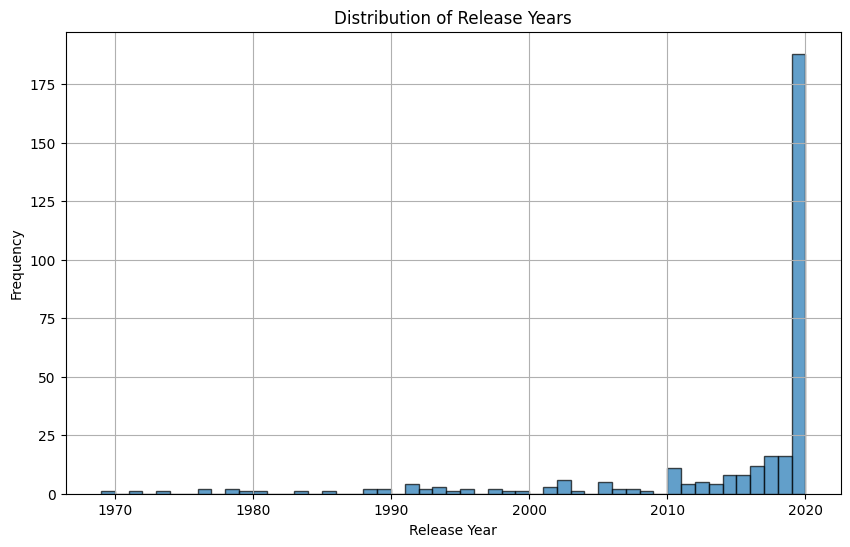

In [15]:
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt

# Function definitions for URL expansion and retrieving release years...

# Replace this with your own access token
access_token = 'BQBhddAJmrzyVu2jzX-FcjgVvn9epClmo3upVr7PvadOyIbi6VqJKBukiLgdi1KeVn7mQ6rHKP4MZD9jIxemb_Tdx_PsS5uzBMPvdbQtMLHMhNIZ_IM'

# Take only the first 1000 links
all_links = all_links_blm[:1000]

# Get expanded links
expanded_links = []
for link in tqdm(all_links, desc="Expanding URLs"):
    expanded_link = expand_shortened_url(link)
    if expanded_link is not None:
        expanded_links.append(expanded_link)

# Get release years for each link
release_years = []
for link in tqdm(expanded_links, desc="Getting Release Years"):
    release_year = get_release_year_from_spotify_link(link, access_token)
    if release_year is not None:
        release_years.append(int(release_year))

# Write release years to a file
with open('release_years.txt', 'w') as file:
    for year in release_years:
        file.write(str(year) + '\n')

# Plot a bar graph if release years are available
if release_years:
    plt.figure(figsize=(10, 6))
    plt.hist(release_years, bins=range(min(release_years), max(release_years) + 1), edgecolor='black', alpha=0.7)
    plt.title('Distribution of Release Years')
    plt.xlabel('Release Year')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("No release years available to plot the histogram.")


In [10]:
all_links_blm[1:10]

['https://t.co/Taz0wbZrPm',
 'https://t.co/zu2KFjXm9l',
 'https://t.co/zULuuoEBGt',
 'https://t.co/k6mR4Rzlp8',
 'https://t.co/rIwTzEETXN',
 'https://t.co/F70VNk5fIC',
 'https://t.co/JxpTaMBdiK',
 'https://t.co/yloRHKVJWU',
 'https://t.co/v1xP9jsFAl']

In [13]:
import requests
from tqdm import tqdm

def expand_shortened_url(shortened_url):
    try:
        response = requests.head(shortened_url, allow_redirects=True)
        if response.status_code == 200:
            return response.url
        else:
            return None
    except requests.exceptions.RequestException as e:
        print("An error occurred:", e)
        return None

def get_release_year_from_spotify_link(link, access_token):
    if link is None:
        return None
    
    # Extract the track ID from the Spotify link
    track_id = link.split('/')[-1].split('?')[0]

    # Set up the request headers with the access token
    headers = {
        'Authorization': f'Bearer {access_token}'
    }

    # Make a request to the Spotify API to get track information
    response = requests.get(f'https://api.spotify.com/v1/tracks/{track_id}', headers=headers)
    if response.status_code == 200:
        track_info = response.json()
        if 'release_date' in track_info['album']:
            release_year = track_info['album']['release_date'][:4]  # Extract the year from the release date
            return release_year
        else:
            return None
    else:
        # print("Error:", response.status_code)
        return None

def process_links_and_append_years(links, access_token):
    # Get expanded links
    expanded_links = []
    for link in tqdm(links, desc="Expanding URLs"):
        expanded_link = expand_shortened_url(link)
        if expanded_link is not None:
            expanded_links.append(expanded_link)

    # Get release years for each link
    release_years = []
    for link in tqdm(expanded_links, desc="Getting Release Years"):
        release_year = get_release_year_from_spotify_link(link, access_token)
        if release_year is not None:
            release_years.append(int(release_year))

    # Append release years to the file
    with open('release_years.txt', 'a') as file:
        for year in release_years:
            file.write(str(year) + '\n')

# Replace this with your own access token
access_token = 'BQAf6eTDcBpy3LfwR1-MBXEUbnyr5E6PaDpJ6vOds-dJQaG7NOflXbByvBHNnNJTORHD49N7R76eVqFJQs8XNHeSQUx3XqVO53X-VUKiFS9hardn3rw'



# Define the range of links to process (1000 to 2999 in this example)
start_index = 9000
end_index = 11000

# Take links from the specified range
links_to_process = all_links_blm[start_index:end_index]

# Process the links and append release years to the file
process_links_and_append_years(links_to_process, access_token)


Expanding URLs:  25%|██▍       | 496/2000 [13:26<34:19,  1.37s/it]  

An error occurred: HTTPSConnectionPool(host='tun.in', port=443): Max retries exceeded with url: /pi0Ev (Caused by SSLError(CertificateError("hostname 'tun.in' doesn't match either of '*.core-prod.us-west-2.tunenet.io', '*.tunein.com', '*.radiotime.com'")))


Expanding URLs:  31%|███       | 617/2000 [17:34<36:16,  1.57s/it]  

An error occurred: HTTPSConnectionPool(host='tun.in', port=443): Max retries exceeded with url: /pi0Ev (Caused by SSLError(CertificateError("hostname 'tun.in' doesn't match either of '*.core-prod.us-west-2.tunenet.io', '*.tunein.com', '*.radiotime.com'")))


Getting Release Years: 100%|██████████| 1719/1719 [08:13<00:00,  3.48it/s]
